# Load / Test

In [1]:
from getpass import getpass
import os
os.environ['HF_TOKEN'] = getpass('Enter your HF token:')

Enter your HF token:········


In [5]:
from transformers import AutoTokenizer, AutoModelForCausalLM
import torch
import numpy as np
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

tokenizer = AutoTokenizer.from_pretrained("architext/gptj-162M", use_auth_token=os.environ['HF_TOKEN'])
model = AutoModelForCausalLM.from_pretrained("architext/gptj-162M", use_auth_token=os.environ['HF_TOKEN']).to(device)

/fsx/honglu/miniconda3/envs/py39/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [138]:
from huggingface_hub import hf_hub_download
hf_hub_download(repo_id="architext/gptj-162M", filename="pytorch_model.bin", use_auth_token=os.environ['HF_TOKEN'])

Downloading: 100%|██████████| 329M/329M [00:03<00:00, 104MB/s] 


'/fsx/home-honglu/.cache/huggingface/hub/9b3cefdd29835e79c539173775e33757f8a7930411ab125fcf9a68eac67047a6.f8dc756558b8eb8da406faf61f025fbcdc81c71dfd43cfaf6df55d9f53a72151'

In [74]:
#seed_prompts = np.loadtxt('prompts.txt', dtype=str, delimiter='\n')
with open('prompts.txt', 'r') as f:
    seed_prompts = f.readlines()
seed_prompts = [str(prompt.rstrip()) for prompt in seed_prompts]

In [89]:
output = model.generate(**tokenizer('[prompt] '+ seed_prompts[0] +' [layout]', return_tensors='pt').to(device), num_return_sequences=16, do_sample=True, num_beams=1, max_length=500)
print()

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


In [90]:
tokenizer.batch_decode(output)

['[prompt] a house with five rooms [layout] bedroom1: (121,231)(91,231)(91,172)(121,172), living_room: (121,172)(62,172)(62,55)(106,55)(106,69)(121,69), bathroom1: (179,157)(135,157)(135,128)(179,128), bedroom2: (194,128)(135,128)(135,55)(194,55), bathroom2: (150,55)(106,55)(106,25)(150,25), kitchen: (194,187)(135,187)(135,157)(194,157), corridor: (121,187)(121,69)(106,69)(106,55)(135,55)(135,187) <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><

In [91]:
tokenizer.pad_token = tokenizer.eos_token
tokenizer.padding_side = 'left'
t = tokenizer(['[prompt] '+ seed_prompts[i] +' [layout]' for i in range(0, 6)], padding=True, return_tensors='pt').to(device)

In [88]:
import random

lines = st[0].split(', ')
#print(lines.pop(random.randint(1, len(lines))))
#print(lines.pop(random.randint(1, len(lines))))

#newtext = ', '.join(lines)
#newtext = newtext[:newtext.find('<|endoftext|>')].strip()
#print(newtext)
cut_off = np.random.randint(1, 3, size=1)[0]
cut_off = min(cut_off, len(lines)-1)
new_prompt = lines[0] + ', ' + ', '.join(lines[1:cut_off])
print(new_prompt + ", bedroom1:")

NameError: name 'st' is not defined

In [93]:
#output = model.generate(**tokenizer(new_prompt + " bedroom1:", return_tensors='pt').to(device), do_sample=True, num_return_sequences=16, num_beams=1, max_length=1000)
output = model.generate(**t, do_sample=True, num_beams=5, max_length=1000)

tokenizer.batch_decode(output)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


['<|endoftext|>[prompt] a house with five rooms [layout] bedroom1: (106,106)(62,106)(62,47)(106,47), living_room: (135,209)(33,209)(33,135)(135,135), bathroom1: (135,121)(106,121)(106,77)(135,77), bedroom2: (179,209)(135,209)(135,135)(179,135), bathroom2: (223,135)(194,135)(194,106)(223,106), bedroom3: (179,106)(135,106)(135,62)(179,62), kitchen: (91,135)(33,135)(33,106)(91,106), corridor: (194,135)(91,135)(91,106)(106,106)(106,121)(135,121)(135,106)(194,106) <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|>',
 '<|endoftext|><|endoftext|>[prompt] a house with six rooms [layout] <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endofte

In [93]:
output = model.generate(**tokenizer(st[0] + '[prompt]', return_tensors='pt').to(device), do_sample=True, num_beams=5, max_length=500)
tokenizer.batch_decode(output)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


['[prompt] a house with five rooms [layout] bedroom1: (128,91)(84,91)(84,33)(128,33), living_room: (157,165)(99,165)(99,91)(157,91), kitchen: (201,223)(157,223)(157,179)(201,179), bathroom1: (187,179)(157,179)(157,135)(187,135), bedroom2: (157,209)(113,209)(113,165)(157,165), bedroom3: (99,165)(55,165)(55,121)(99,121), bedroom4: (113,209)(55,209)(55,165)(113,165), bathroom2: (99,121)(69,121)(69,91)(99,91), bathroom3: (84,91)(55,91)(55,47)(84,47) <|endoftext|>[prompt] the kitchen is located in the south east side of the house [layout] bathroom1: (216,135)(187,135)(187,91)(216,91), bedroom1: (201,209)(128,209)(128,150)(201,150), bathroom2: (128,165)(84,165)(84,150)(99,150)(99,135)(128,135), living_room: (128,121)(40,121)(40,47)(128,47), bedroom2: (187,135)(143,135)(143,121)(128,121)(128,77)(187,77), kitchen: (84,194)(40,194)(40,150)(84,150), corridor: (201,150)(128,150)(128,135)(99,135)(99,150)(40,150)(40,121)(143,121)(143,135)(201,135) <|endoftext|>']

# MAPElites

## (Not production codes!!)

In [54]:
from abc import ABC, abstractmethod
from typing import Optional, Union, TypeVar, Generic

import numpy as np
from tqdm import trange

Phenotype = Optional[np.ndarray]
Mapindex = Optional[tuple]

# This Genotype class is implemented in Herbie's cleanup branch. Need to delete if you merge.
class Genotype(ABC):
    def __str__(self) -> str:
        raise NotImplementedError
        
GenoType = TypeVar('GenoType', bound=Genotype)
        
class MAPElites:
    def __init__(self, env, n_bins: int):
        self.env = env
        self.n_bins = n_bins
        #self.history_length = history_length
        self.history = []

        # discretization of behaviour space
        self.bins = np.linspace(*env.behaviour_space, n_bins + 1)[1:-1].T
        # perfomance of niches
        self.fitnesses = np.full([n_bins] * env.behaviour_ndim, -np.inf)
        # niches' sources
        self.genomes = np.zeros(self.fitnesses.shape, dtype=object)
        # index over explored niches to select from
        self.nonzero = np.full(self.fitnesses.shape, False)

        # bad mutations that ended up with invalid output.
        self.recycled = []
        #self.recycled_count = 0
        
        # outdated elites
        self.old_elites = []

        print(f"MAP of size: {self.fitnesses.shape} = {self.fitnesses.size}")

    def to_mapindex(self, b: Phenotype) -> Mapindex:
        return None if b is None else tuple(np.digitize(x, bins) for x, bins in zip(b, self.bins))

    def random_selection(self) -> Mapindex:
        ix = np.random.choice(np.flatnonzero(self.nonzero))
        return np.unravel_index(ix, self.nonzero.shape)

    def search(self, initsteps: int, totalsteps: int, atol=1, batch_size=32):
        tbar = trange(int(totalsteps))
        max_fitness = -np.inf
        max_genome = None

        config = {'batch_size': batch_size}

        for n_steps in tbar:
            self.history.append(np.copy(self.genomes))
            
            if n_steps < initsteps:
                # Initialise by generating initsteps random solutions.
                #comment: here we can sample 1 layout out of each prompt, to initiate the map
                x = self.env.random(**config)
            else:
                # Randomly select an elite from the map
                map_ix = self.random_selection()
                x = self.genomes[map_ix]
                # Mutate the elite
                x = self.env.mutate(x, **config)

            # Now that `x` is a list, we put them into the behaviour space one-by-one.
            for individual in x:
                map_ix = self.to_mapindex(self.env.to_behaviour_space(individual))
                
                # if the return is None, the individual is invalid and is thrown into the recycle bin.
                # comment: we should keep infeasible designs here if we can; eventually we'd need a metric of how far they are from a valid design
                if map_ix is None:
                    #self.recycled[self.recycled_count % len(self.recycled)] = individual
                    #self.recycled_count += 1
                    self.recycled.append(individual)
                    continue

                self.nonzero[map_ix] = True

                f = self.env.fitness(individual)
                # If new fitness greater than old fitness in niche, replace.
                if f > self.fitnesses[map_ix]:
                    self.fitnesses[map_ix] = f
                    self.old_elites.append((n_steps, self.genomes[map_ix]))
                    self.genomes[map_ix] = individual
                # If new fitness is the highest so far, update the tracker.
                if f > max_fitness:
                    max_fitness = f
                    max_genome = individual

                    tbar.set_description(f'{max_fitness=:.4f} of "{str(max_genome)}"')
                # If best fitness is within atol of the maximum possible fitness, stop.
                if np.isclose(max_fitness, self.env.max_fitness, atol=atol):
                    break

        return str(self.genomes[np.unravel_index(self.fitnesses.argmax(), self.fitnesses.shape)])

    def plot(self):
        import matplotlib
        from matplotlib import pyplot

        matplotlib.rcParams['font.family'] = 'Futura'
        matplotlib.rcParams['figure.dpi'] = 100
        matplotlib.style.use('ggplot')

        ix = tuple(np.zeros(self.fitnesses.ndim - 2, int))
        print(ix)
        map2d = self.fitnesses[ix]
        print(f'{map2d.shape=}')

        pyplot.pcolor(map2d, cmap='inferno')
        pyplot.show()
        
class BaseEnvironment(ABC, Generic[GenoType]):
    def __init__(self) -> None:
        self.genotype_space: np.ndarray

    @abstractmethod
    def random(self, n_seed, **kwarg) -> list[GenoType]:
        raise NotImplementedError
        
    @abstractmethod
    def mutate(self, x: GenoType, **kwarg) -> list[GenoType]:
        raise NotImplementedError

    @abstractmethod
    def fitness(self, x: GenoType) -> float:
        raise NotImplementedError

    @abstractmethod
    def to_behaviour_space(self, x: GenoType) -> Phenotype:
        raise NotImplementedError

    @property
    def max_fitness(self) -> int:
        return 0

    @property
    # [starts, endings) of search intervals
    def behaviour_space(self) -> np.ndarray:
        return self.genotype_space

    @property
    def behaviour_ndim(self) -> int:
        return self.behaviour_space.shape[1]

## new codes

In [55]:
# NOTE: random seed and config are not really used in the Architext class. Need to also put them into the right
# places in production code.

import os
import random
from abc import ABC
from math import log, e
import re
from omegaconf import DictConfig, OmegaConf
from shapely.geometry.polygon import Polygon
from shapely.geometry import shape
from shapely.affinity import scale
from shapely.ops import unary_union
import networkx as nx
from typing import List
from PIL import Image, ImageDraw

def draw_polygons(polygons, colors, im_size=(512, 512), b_color="white", fpath=None):
    
    image = Image.new("RGBA", im_size, color="white") #Image.new("L", im_size, color="white")
    draw = ImageDraw.Draw(image)

    for poly, color, in zip(polygons, colors):
        xy = poly.exterior.xy
        coords = np.dstack((xy[1], xy[0])).flatten()
        draw.polygon(list(coords), fill=(0, 0, 0))       
        
        #get inner polygon coordinates
        small_poly = poly.buffer(-1, resolution=32, cap_style=2, join_style=2, mitre_limit=5.0)
        if small_poly.geom_type == 'MultiPolygon':
            mycoordslist = [list(x.exterior.coords) for x in small_poly]
            for coord in mycoordslist:
                coords = np.dstack((np.array(coord)[:,1], np.array(coord)[:, 0])).flatten()
                draw.polygon(list(coords), fill=tuple(color)) 
        elif poly.geom_type == 'Polygon':
            #get inner polygon coordinates
            xy2 = small_poly.exterior.xy
            coords2 = np.dstack((xy2[1], xy2[0])).flatten()
            # draw it on canvas, with the appropriate colors
            draw.polygon(list(coords2), fill=tuple(color)) 

    #image = image.transpose(Image.FLIP_TOP_BOTTOM)

    if(fpath):
        image.save(fpath, format='png', quality=100, subsampling=0)
        np.save(fpath, np.array(image))

    return draw, image

def calc_entropy(labels, base=None):
    """ Computes entropy of label distribution. """
    n_labels = len(labels)
    if n_labels <= 1:
        return 0
    value,counts = np.unique(labels, return_counts=True)
    probs = counts / n_labels
    n_classes = np.count_nonzero(probs)
    if n_classes <= 1:
        return 0
    ent = 0.
    # Compute entropy
    base = e if base is None else base
    for i in probs:
        ent -= i * log(i, base)
        
    return ent

def get_value(dictionary, val):
    for key, value in dictionary.items():
        if val == key:
            return value
 
    return "value doesn't exist"

def get_key(dictionary, val):
    for key, value in dictionary.items():
        if val == value:
            return key
 
    return "key doesn't exist"

def find_intersections(seed_polygon, target_polygons):
    """
        A function that finds intersections between a seed polygon and a list of candidate polygons.

    Args:
        seed_polygon (shapely polygon): A shapely polygon.
        target_polygons (list): A list of shapely polygons.

    Returns:
        array: The intersection matrix between the seed polygon and all individual target polygons.
    """
    intersect_booleans = []
    for _, poly in enumerate(target_polygons):
        try:
            intersect_booleans.append(seed_polygon.intersects(poly))
        except:
            intersect_booleans.append(True)
    return intersect_booleans

def find_distance(seed_graph, target_graphs):
    """
        A function that finds intersections between a seed polygon and a list of candidate polygons.

    Args:
        seed_polygon (shapely polygon): A shapely polygon.
        target_polygons (list): A list of shapely polygons.

    Returns:
        array: The intersection matrix between the seed polygon and all individual target polygons.
    """
    distances = [nx.graph_edit_distance(seed_graph, graph) for graph in target_graphs]
    return distances

def eval_function(samples, prompts, prompt_types):
    semantic_accuracy = []
    reward = []
    # assuming a batch of layouts sampled from the model
    for prompt, layout, prompt_type in zip(prompts, samples, prompt_types):
        geom = []
        try:
            # get layout geometry
            spaces, _, polygons = extract_layout_properties(layout)
            for poly in polygons:
                poly = [x for x in poly if x != ['']]
                poly = [x for x in poly if '' not in x] 
                geom.append(Polygon(np.array(poly, dtype=int)))

            # get geometric properties: centroids and vectors
            room_centroids = get_room_centroids(geom)
            vectors = get_room_vectors(geom, room_centroids)
            
            # get layout annotations based on number of rooms and location
            desc = []
            num_desc = num_rooms_annotation(spaces)
            desc.extend(list(set(flatten(num_desc))))
            loc_desc = location_annotations(spaces, vectors)
            desc.extend(list(set(flatten(loc_desc))))
            desc = [re.sub('_', ' ', d) for d in desc]

            # calculate semantic accuracy: number of generations that satisfy the prompt
            semantic_accuracy.append(prompt in desc)

            # calculate reward according to type of prompt: difference or distance
            type_reward = get_reward(prompt, spaces, desc, prompt_type)
            reward.append(type_reward)
        except:
            # what type of values should we put when the model fails to create a valid design?
            semantic_accuracy.append(-1)
            reward.append(-1)

    results = {'semantic_accuracy': semantic_accuracy, 'reward': reward}
    #results.append((semantic_accuracy, type_reward))
    return results

housegan_labels = {"living_room": 1, "kitchen": 2, "bedroom": 3, "bathroom": 4, "missing": 5, "closet": 6, 
                         "balcony": 7, "corridor": 8, "dining_room": 9, "laundry_room": 10}
regex = re.compile(".*?\((.*?)\)")

class LocalGenerator:
    """
    An ad hoc implementation of generating hf outputs in the local machine. Just to make things run temporarily and 
    may not be final in the repo.
    """
    def __init__(self, token, model_str='architext/gptj-162M'):
        """
        Parameters:
            token: hf token.
            model_str: (Optional) hf model string.
        """
        self.token = token
        self.tokenizer = AutoTokenizer.from_pretrained(model_str, use_auth_token=self.token)
        self.model = AutoModelForCausalLM.from_pretrained(model_str, use_auth_token=self.token)
        
    def __call__(self, prompt, batch_size=16, **kwargs):
        config = {'return_tensors': 'pt'}
        
        output = self.model.generate(**self.tokenizer(prompt, **config), num_return_sequences=batch_size, **kwargs)
        return self.tokenizer.batch_decode(output)
        

class ArchitextGenotype(Genotype):
    architext_colors = [[0, 0, 0], [249, 222, 182], [195, 209, 217], [250, 120, 128], [126, 202, 234], [190, 0, 198], [255, 255, 255], 
                   [6, 53, 17], [17, 33, 58], [132, 151, 246], [197, 203, 159], [6, 53, 17],]
    
    end_token_str = '<|endoftext|>'
    
    def __init__(self, code: str, height: float, layout: Optional[str]):
        self.code = code
        
        end_index = layout.find(self.end_token_str)
        cut_off_index = end_index + len(self.end_token_str) if end_index != -1 else None
        self.layout = layout[:cut_off_index].strip()
        
        self.height = height
        self.valid = self.validate()
    
    def get_clean_layout(self) -> str:
        if(len(self.layout.split('[layout]')) > 1):
            clean_layout = self.layout.split('[layout]')[1].split('[prompt]')[0].split(', ')
        else:
            clean_layout = self.layout.split('[Layout]')[1].split('[prompt]')[0].split(', ')
        return clean_layout

    def get_spaces(self) -> list:
        clean_layout = self.get_clean_layout()
        spaces = [re.sub(r'\d+', '', txt.split(':')[0]).lstrip() for txt in clean_layout]
        return spaces

    def get_space_ids(self) -> list:
        spaces = self.get_spaces()
        space_ids = [get_value(housegan_labels, space) for space in spaces]
        return space_ids

    def get_coordinates(self) -> list:
        clean_layout = self.get_clean_layout()
        coordinates = [txt.split(':')[1] for txt in clean_layout if len(txt.split(':')) > 1]
        coordinates = [re.findall(regex, coord) for coord in coordinates]
        coordinates = [x for x in coordinates if x != []]
        return coordinates

    def get_polygons(self) -> list:
        coordinates = self.get_coordinates()
        rectangles = []
        polygons = []
        for coord in coordinates:
            rectangles.append([point.split(',') for point in coord])
        for rec in rectangles:
            rec = [x for x in rec if x != ['']]
            rec = [x for x in rec if '' not in x] 
            polygons.append(Polygon(np.array(rec, dtype=int)))

        return polygons

    def gfa(self) -> str:
        polygons = self.get_polygons()
        gfa = np.sum(np.array([poly.area() for poly in polygons]))
        return gfa

    def __str__(self) -> str:
        return self.layout if self.valid else ""

    def validate(self) -> bool:
        try:
            res = self.hlff() + self.gfa_entropy()
            img = self.get_image()
        except:
            return False
        return isinstance(res, float)

    def adjacency_matrix(self):
        scaled_polygons = []
        for polygon in self.get_polygons():
            scaled_polygons.append(scale(polygon, 1.15, 1.15, origin=polygon.centroid))
        intersection_matrix = np.zeros((len(scaled_polygons), len(scaled_polygons)))
        for k, p in enumerate(scaled_polygons):
            intersection_matrix[:, k] = find_intersections(p, scaled_polygons)
        return intersection_matrix

    def create_node_dict(self):
        space_ids = self.get_space_ids()
        values = [get_key(housegan_labels, id_) for id_ in space_ids]
        keys = np.arange(len(space_ids))
        return dict(zip(keys, values))

    def get_labelled_graph(self) -> list:
        adj_matrix = self.adjacency_matrix()
        labels = self.create_node_dict()
        graph = nx.from_numpy_matrix(adj_matrix)
        nx.relabel.relabel_nodes(graph, labels, copy=False)
        return graph

    def hlff(self) -> float:
        #Quality - hlff
        joined = unary_union(self.get_polygons()) # need to add this property to individual
        surface_area = joined.length * self.height #
        floor_area = joined.area
        hlff = (2*floor_area + surface_area) / floor_area
        return -hlff

    def gfa_entropy(self) -> float:
        room_gfa = [rm.area for rm in self.get_polygons()]
        gfa_entropy = calc_entropy(room_gfa)
        return gfa_entropy
    
    def typology(self) -> int:
        spaces = self.get_spaces()
        # typologies: [1b1b, 2b1b, 2b2b, 3b1b, 3b2b, 3b3b, 4b1b, 4b2b, 4b3b, 4b4b]
        typologies = [(1,1), (1,2), (1,3), (2,1), (2,2), (2,3), (3,1), (3,2), (3,3), (4,1), (4,2), (4,3)]
        nbed = np.where(np.array(spaces) == 'bedroom')[0].shape[0]
        nbath = np.where(np.array(spaces) == 'bathroom')[0].shape[0]
        return typologies.index((nbed, nbath))
    
    def get_image(self):
        polygons = self.get_polygons()
        return draw_polygons(polygons, self.architext_colors)[1]
                
    def _repr_png_(self):
        return self.get_image().tobytes()
            


class Architext(BaseEnvironment):
    """
    This will try to mutate layouts using architext-FIM models. 
    
    The Heat Loss Form Factor will be used as the quality metric, defined as: 
    heat loss form factor = heat loss area / treated floor area, assuming that all area is treated. 
    Numerically, this is calculated as: hllff = sum(surface_area) / floor_area

    The behavioral descriptors will be layout typology (measured by number of bedrooms and bathrooms) and the entropy
    of the floor area distribution across different spaces in the layout.
    """
    # Record different definitions of behaviour spaces in a dict. Feel free to add.
    behaviour_mode_spec = {'hlff_and_fae':
                               {'genotype_ndim': 2,
                                'genotype_space': np.array([[0, 3.25], [0, 12]]).T
                               }
                          }
    model_param = {'do_sample': True,
                   'num_beams': 1, 
                   'max_length': 500}
    room_labels = ['bedroom1', 'kitchen', 'living_room', 'corridor', 'bathroom1']

    def __init__(self, seed: str, config: Union[str, dict, DictConfig], prompts: list, height: float,
                 inference_server=None, behaviour_mode='hlff_and_fae', model_param=model_param):
        """
        Parameters:
            seed: the seed layouts.
            config: the config file or dict.
            prompts: list of different prompts that can be attached to selected layouts.
            inference_server: (Optional) the address of the inference server: 'domain:port'. If None, load model locally.
        """
        self.seed = seed
        self.height = height
        self.np_rng = np.random.RandomState(seed=np.random.randint(1, 1e8))

        if isinstance(config, str):
            self.config = OmegaConf.load(config)
        elif isinstance(config, (dict, DictConfig)):
            self.config = DictConfig(config)
        else:
            raise ValueError

        self.prompts = prompts
        self.model_param = model_param

        # Use RNG to rotate random seeds during inference.
        self.rng = np.random.default_rng(seed=self.config.seed)

        self.behaviour_mode = behaviour_mode
        self.genotype_ndim = self.behaviour_mode_spec[self.behaviour_mode]['genotype_ndim']
        self.genotype_space = self.behaviour_mode_spec[self.behaviour_mode]['genotype_space']
        
        self.inference_server = inference_server
        self.local_generator = LocalGenerator(os.environ['HF_TOKEN']) if self.inference_server is None else None

    def random(self, **kwargs) -> List[ArchitextGenotype]:
        """
        Sample layouts from the model by randomly selecting prompts.
        Returns:
            the generated layout in a string representation.
        """
        return [ArchitextGenotype(code='', layout=x, height=self.height) for x in self._get_layout(self.seed + random.choice(self.prompts), **self.model_param, **kwargs)]

    
    def mutate(self, x: Genotype, **kwargs) -> List[ArchitextGenotype]:
        # TODO: batch_size > 1 is not implemented yet!!
        lines = x.layout.split(', ')

        cut_off = np.random.randint(1, 3, size=1)[0]
        cut_off = min(cut_off, len(lines)-1)
        new_prompt = lines[0] + ', ' + ', '.join(lines[1:cut_off]) + ", " + random.choice(self.room_labels) + ":"
        #print(new_prompt)
        return [ArchitextGenotype(code='', layout=x, height=self.height) for x in self._get_layout(new_prompt, **self.model_param, **kwargs)]

    
    '''
    def mutate(self, x: Genotype, **kwargs) -> List[ArchitextGenotype]:
        """
        Take in a sample (np array w/ size (0,chunklength)) and perform a FIM transformation
        on spaces in the layout *only* 
        example (ignore newlines): 
        --------------------------------
        [prompt] a bedroom is adjacent to the kitchen 
        [layout] bedroom1: (194,91)(135,91)(135,47)(194,47), 
        living_room: (121,194)(47,194)(47,91)(106,91)(106,106)(121,106), 
        bathroom1: (179,121)(135,121)(135,91)(179,91), 
        bedroom2: (209,165)(135,165)(135,121)(209,121), 
        bathroom2: (165,209)(135,209)(135,165)(165,165), 
        bedroom3: (121,238)(47,238)(47,194)(121,194), 
        kitchen: (135,77)(106,77)(106,18)(135,18), 
        corridor: (121,209)(121,106)(106,106)(106,77)(135,77)(135,209) <|endoftext|>
        --------------------------------
        The transform will mask one or more spaces from the layout (instead of a random span). 
        The model can then be tasked with predicting the masked spaces.
        --------------------------------
        <prefix token>
        [prompt] a bedroom is adjacent to the kitchen 
        [layout] bedroom1: (194,91)(135,91)(135,47)(194,47), 
        living_room: (121,194)(47,194)(47,91)(106,91)(106,106)(121,106), 
        <suffix token>
        bedroom2: (209,165)(135,165)(135,121)(209,121), 
        bathroom2: (165,209)(135,209)(135,165)(165,165), 
        bedroom3: (121,238)(47,238)(47,194)(121,194), 
        kitchen: (135,77)(106,77)(106,18)(135,18), 
        corridor: (121,209)(121,106)(106,106)(106,77)(135,77)(135,209) 
        <mask token>
        --------------------------------
        """

        #this btw requires the NeoX tokenizer: tokenizer = neox_args.tokenizer and NeoX FIM models
        suffix_tok_id, prefix_tok_id, middle_tok_id = self.tokenizer.vocab_size - 1, self.tokenizer.vocab_size, self.tokenizer.vocab_size + 1
        
        #get full layout
        contents = self.tokenizer.detokenize(x)
        # parse spaces from the layout
        prompt, layout = contents.split("[layout]")
        spaces = layout.split(", ")
        spaces = [s.strip() for s in spaces]
        mutated_layouts = []
        for i in range(0, self.n_mutations):
            try:
                # sample a number of spaces to mask, 
                # mask at least one, keep at least one ?
                num_spaces = self.np_rng.randint(1, len(spaces)-1)
                # select what contiguous spaces to mask
                start_idx = self.np_rng.randint(0, len(spaces)-num_spaces)
                end_idx = start_idx + num_spaces
            except ValueError as e:
                # should probably pass this result to failed mutations, or maybe throw it away and retry idk
                raise e

            prefix = prompt + "[layout] " + ", ".join(spaces[:start_idx])
            #middle = ", ".join(spaces[start_idx:end_idx])
            suffix = ", ".join(spaces[end_idx:]) + " "

            suffix = np.array([suffix_tok_id, *tokenizer.tokenize(suffix)])
            prefix = np.array([prefix_tok_id, *tokenizer.tokenize(prefix)])
            #middle = np.array([middle_tok_id, *tokenizer.tokenize(middle)])

            new_layout = np.concatenate([
                prefix,
                suffix,
                middle_tok_id,
            ])

            mutated_layouts.append(new_layout)

        return [self.local_generator(layout, batch_size=1, **kwargs) for layout in mutated_layouts]
    '''

    def fitness(self, x: ArchitextGenotype) -> float:
        if x.valid:
            return x.hlff()
        else:
            return -np.inf

    def to_behaviour_space(self, x: ArchitextGenotype) -> Phenotype:
        if not x.valid:
            return None
        
        try:
            return np.array([x.gfa_entropy(), x.typology()])
        except:
            return None

    def to_string(self, x: ArchitextGenotype) -> str:
        return str(x)

    def _get_layout(self, full_prompt, batch_size=16, **kwargs) -> Genotype:
        if self.inference_server is None:
            return self.local_generator(full_prompt, batch_size=batch_size, **kwargs)
        else:
            # TODO: Implement this.
            raise NotImplementedError()

    @staticmethod
    def _has_valid_output(x: ArchitextGenotype) -> bool:
        return x.valid

    def _update_seed(self):
        """
        Update the random seed in `self.config.seed` using `self.rng`.
        """
        self.config.seed = int(self.rng.integers(0, 1e8))

    @property
    def max_fitness(self):
        return 0

    @property
    # [starts, endings) of search intervals
    def behaviour_space(self):
        return self.genotype_space

    @property
    def behaviour_ndim(self):
        return self.behaviour_space.shape[1]


## test

In [56]:
import pickle

seed = ""
#target = "bedroom1: (194,106)(165,106)(165,47)(194,47), living_room: (179,223)(106,223)(106,121)(165,121)(165,135)(179,135), bathroom1: (165,106)(135,106)(135,77)(165,77), bedroom2: (135,106)(91,106)(91,33)(135,33), bathroom2: (106,165)(77,165)(77,135)(106,135), bedroom3: (91,106)(77,106)(77,121)(47,121)(47,62)(91,62), kitchen: (209,194)(179,194)(179,135)(194,135)(194,121)(209,121), corridor: (194,135)(165,135)(165,121)(106,121)(106,135)(77,135)(77,106)(194,106) <|endoftext|>"
prompts = ["[prompt] a house with seven rooms and a corridor [layout]",
          "[prompt] a bedroom is located in the east side of the house [layout]",
          "[prompt] a house with two bedrooms and one bathroom [layout]"]

config = {'seed': 42, }
env = Architext(seed, config, height=2.0, prompts=prompts)
elites = MAPElites(env, n_bins=12)
for i in range(10):
    print("Best image", elites.search(initsteps=4 if i == 0 else 0, totalsteps=8))
    with open('elites_ckpt_i', 'wb') as f:
        pickle.dump(elites, f)

MAP of size: (12, 12) = 144


  0%|          | 0/8 [00:00<?, ?it/s]Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
max_fitness=-2.0608 of "[prompt] a house with seven rooms and a corridor [layout] bedroom1: (172,91)(128,91)(128,77)(113,77)(113,47)(172,47), living_room: (201,165)(128,165)(128,91)(201,91), bathroom1: (113,121)(69,121)(69,91)(113,91), bedroom2: (113,179)(55,179)(55,121)(113,121), bathroom2: (128,209)(84,209)(84,179)(128,179), bedroom3: (201,223)(128,223)(128,179)(201,179), kitchen: (113,91)(69,91)(69,33)(113,33), corridor: (201,179)(113,179)(113,77)(128,77)(128,165)(201,165) <|endoftext|>":  12%|█▎        | 1/8 [00:33<03:52, 33.28s/it]Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
TopologyException: side location conflict at 165 123.05681818181819. This can occur if the input geometry is invalid.
max_fitness=-2.0597 of "[prompt] a house with two bedrooms and one bathroom [layout] bedroom1: (91,99)(47,99)(47,55)(91,55), living_room: (165,216)(91,216)(91,

Best image [prompt] a house with two bedrooms and one bathroom [layout] bedroom1: (91,99)(47,99)(47,55)(91,55), living_room: (165,216)(91,216)(91,113)(150,113)(150,128)(165,128), bathroom1: (121,99)(91,99)(91,55)(121,55), bedroom2: (179,99)(121,99)(121,40)(179,40), bathroom2: (209,99)(179,99)(179,69)(209,69), bedroom3: (209,187)(165,187)(165,128)(209,128), kitchen: (91,157)(47,157)(47,99)(77,99)(77,113)(91,113), corridor: (209,128)(150,128)(150,113)(77,113)(77,99)(209,99) <|endoftext|>


/tmp/ipykernel_4912/70917148.py:31: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  mycoordslist = [list(x.exterior.coords) for x in small_poly]


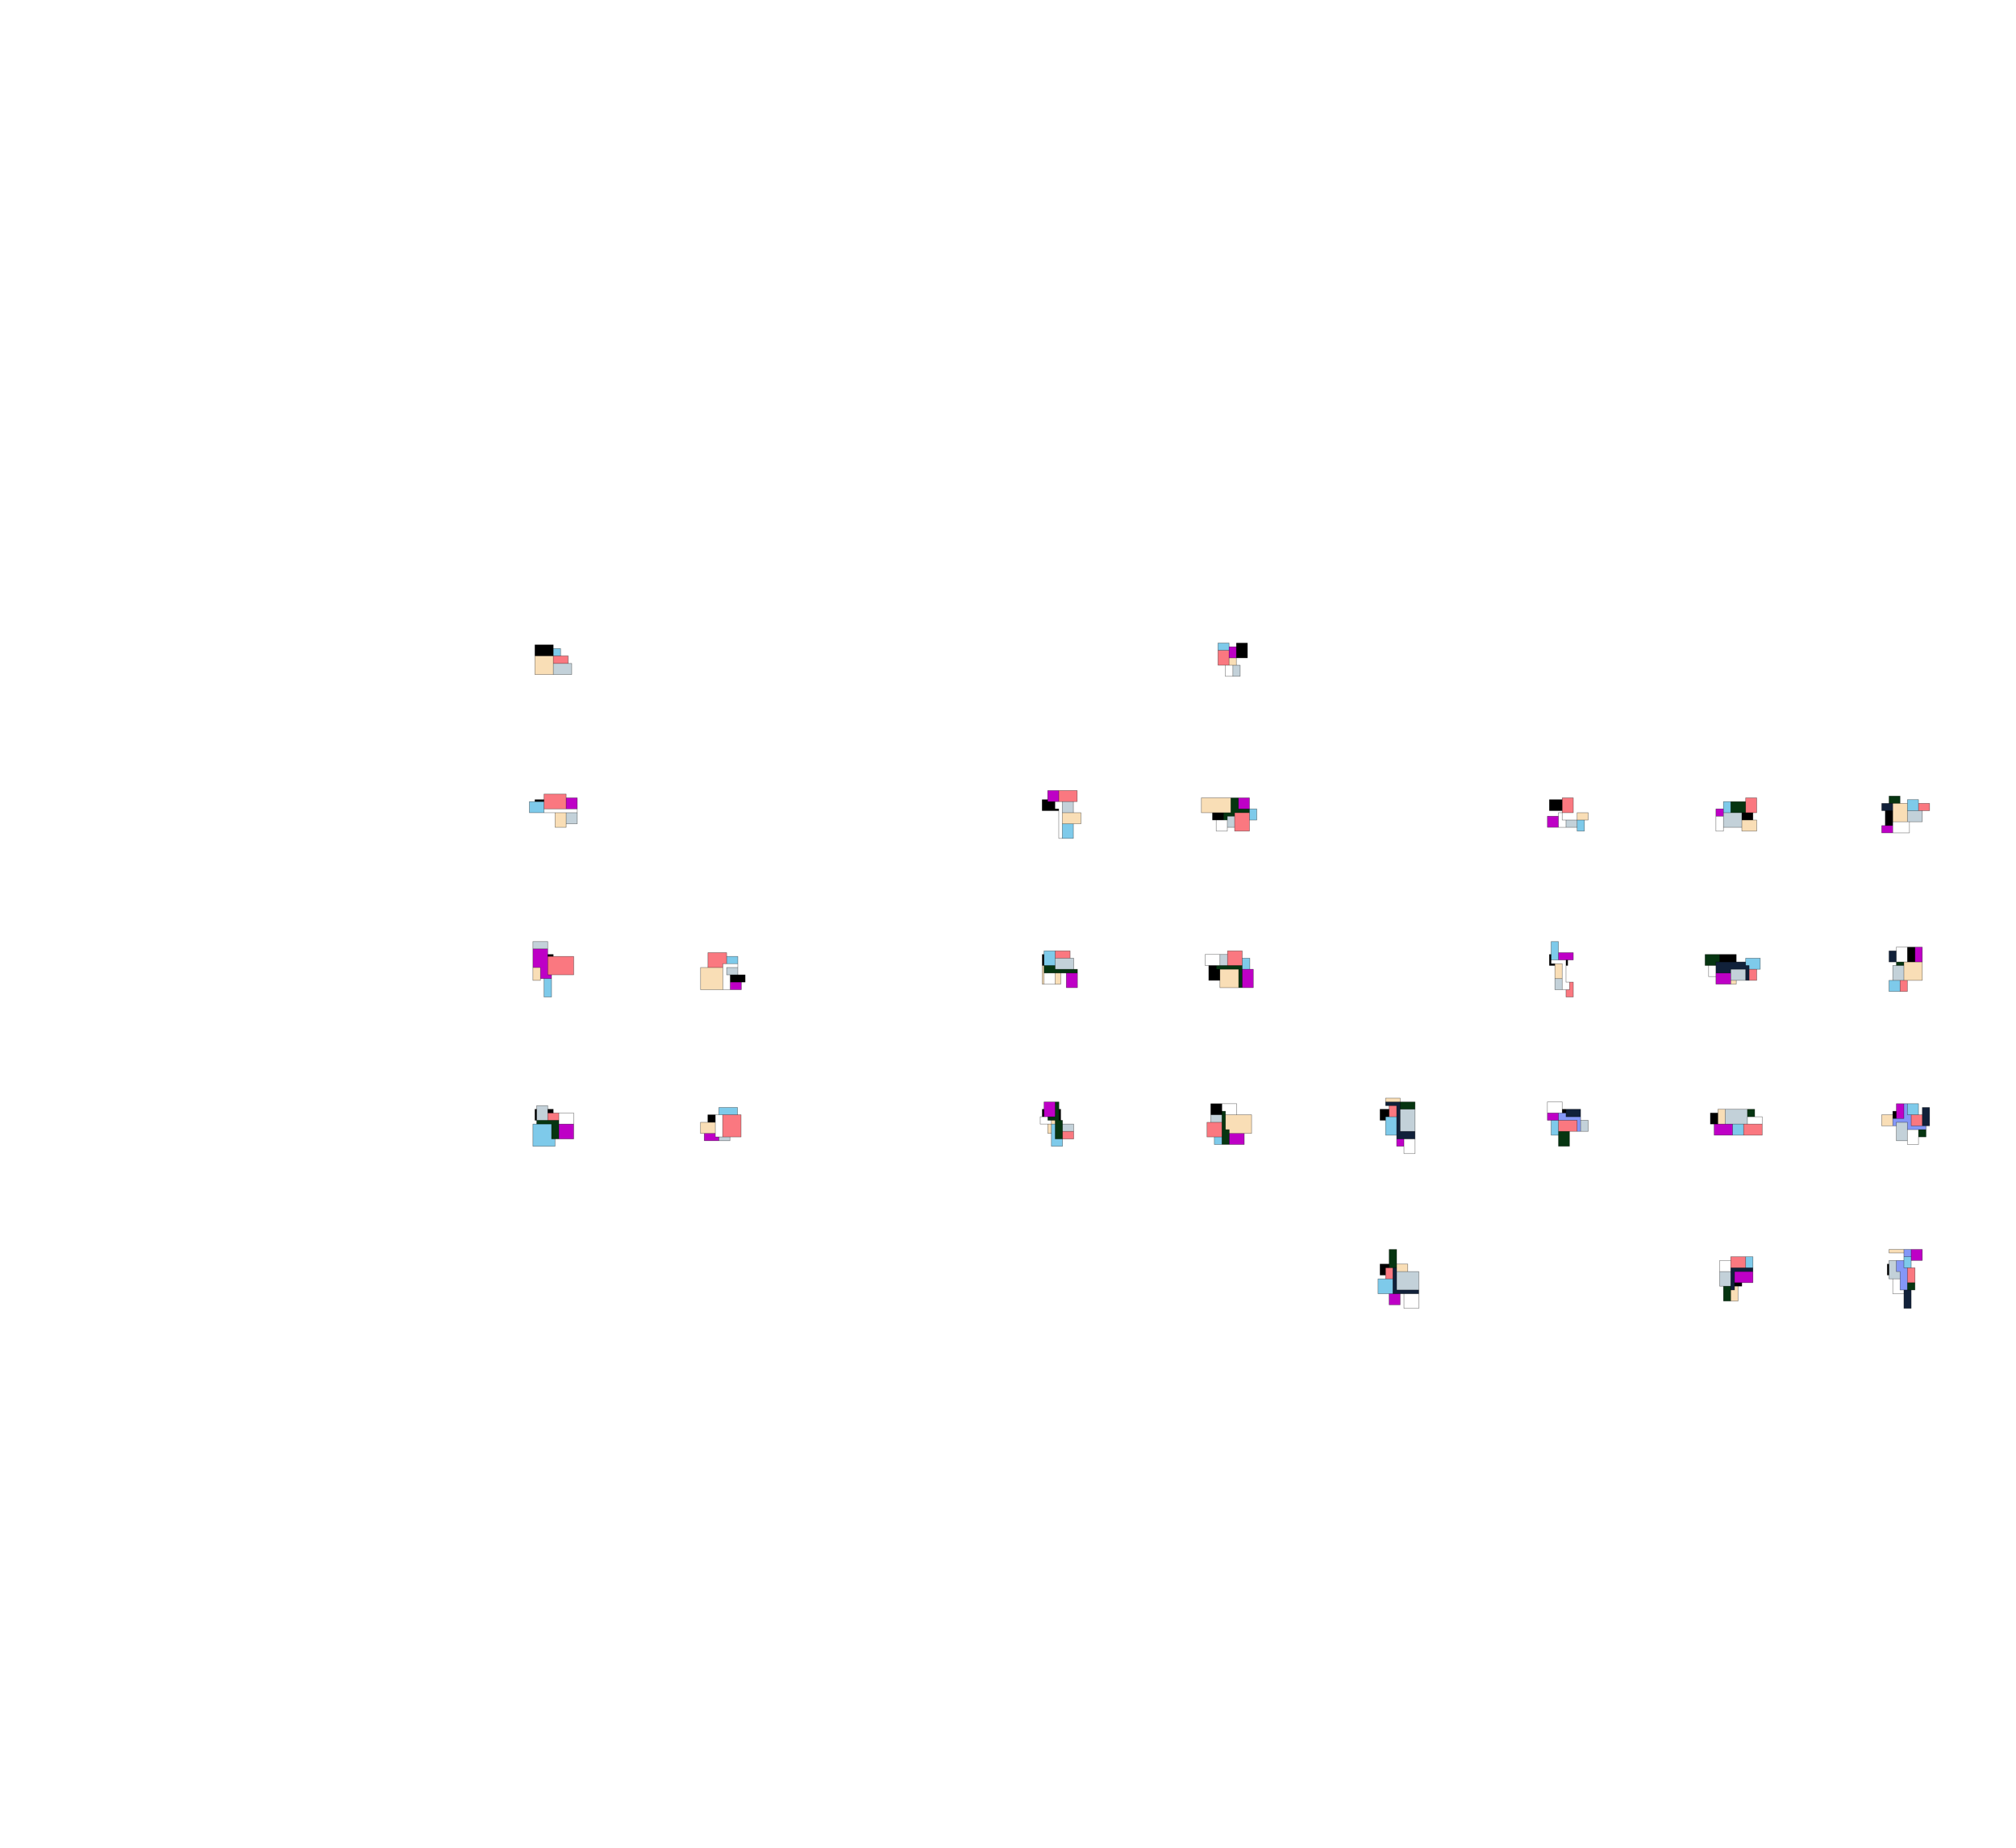

In [57]:
import matplotlib.pyplot as plt

shape = elites.genomes.shape
data = np.ravel(elites.genomes)
columns = 12
rows = len(data) // columns + 1
fig = plt.figure(figsize=(32, 32))
for ind, d in enumerate(data.tolist()):
    fig.add_subplot(rows, columns, ind+1).axis('off')
    if d!=0:
        plt.imshow(d.get_image())

In [119]:
res = elites.env.mutate(elites.genomes[3,0])

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
TopologyException: unable to assign free hole to a shell at 47 121
/tmp/ipykernel_36967/3202420220.py:31: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  mycoordslist = [list(x.exterior.coords) for x in small_poly]
TopologyException: side location conflict at 62 121. This can occur if the input geometry is invalid.


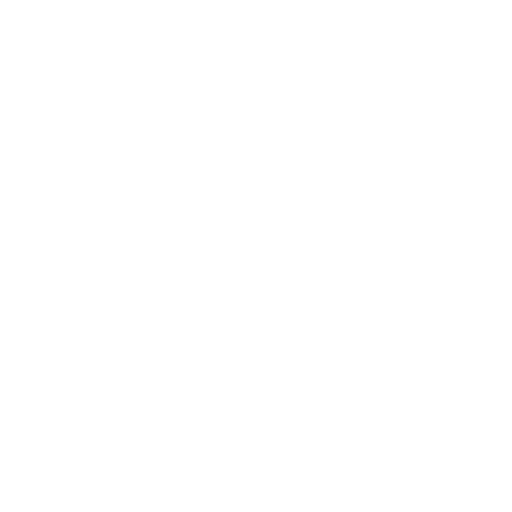

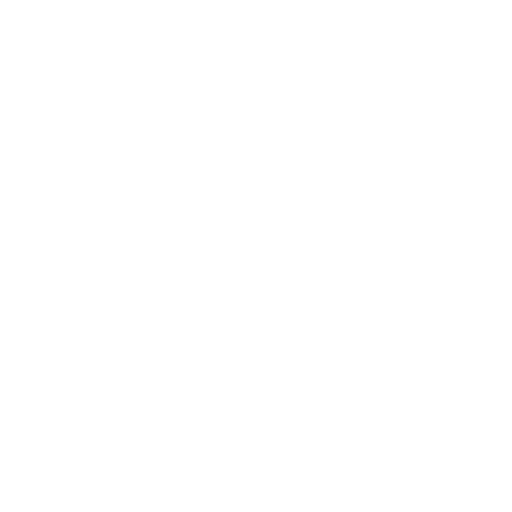

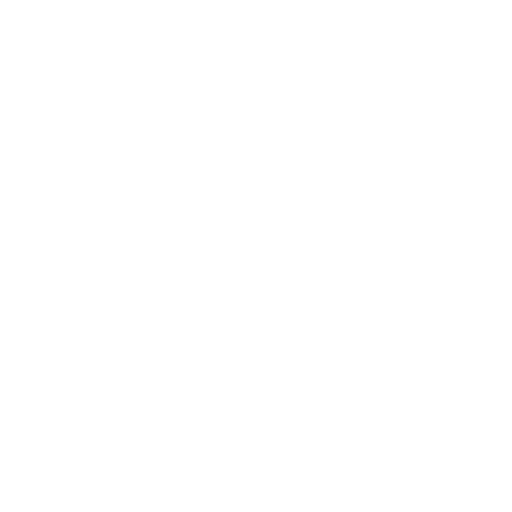

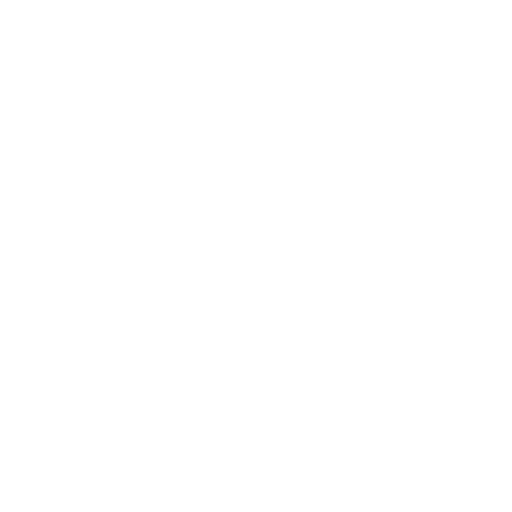

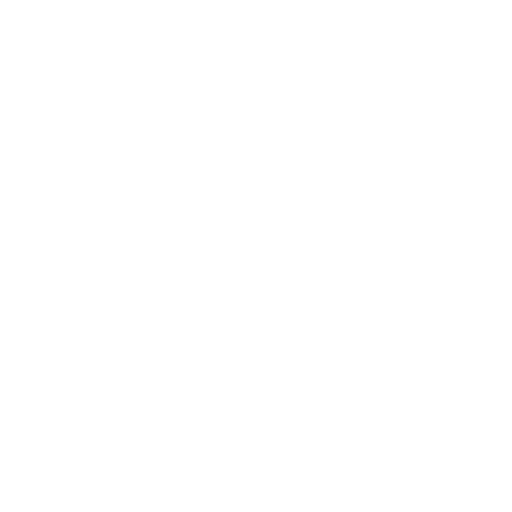

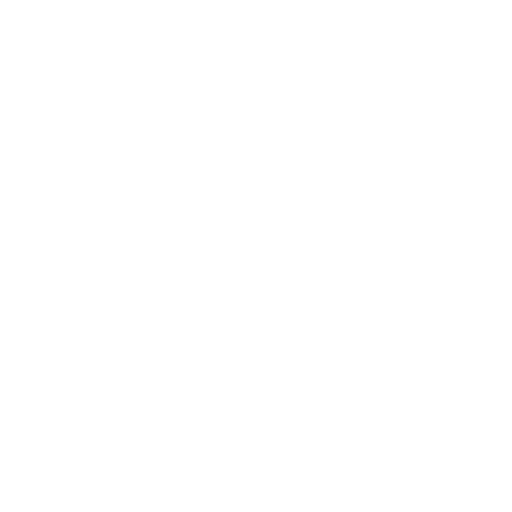

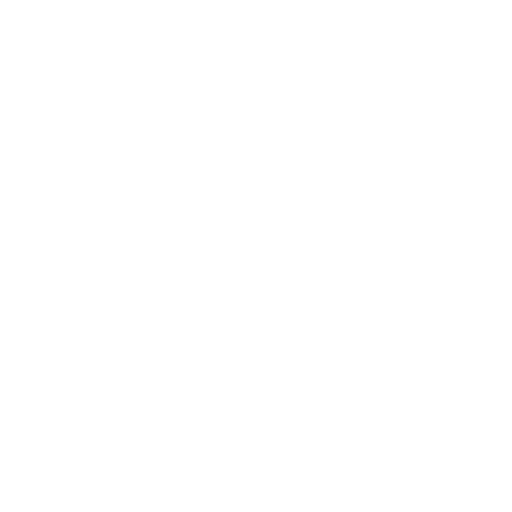

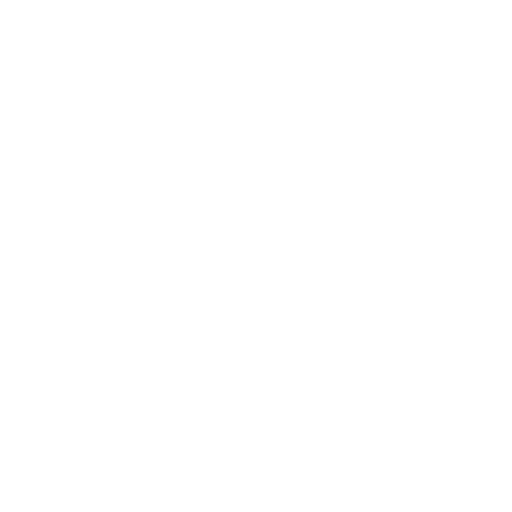

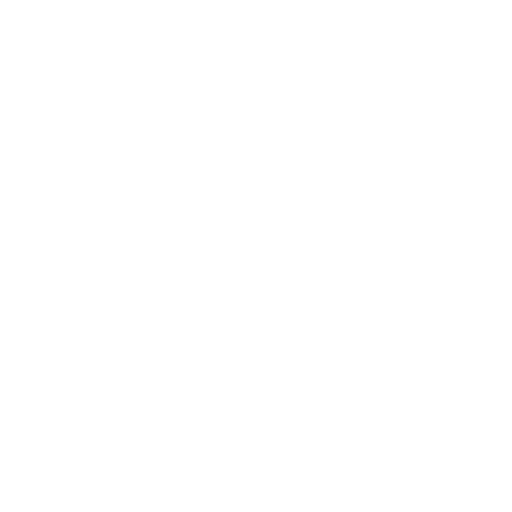

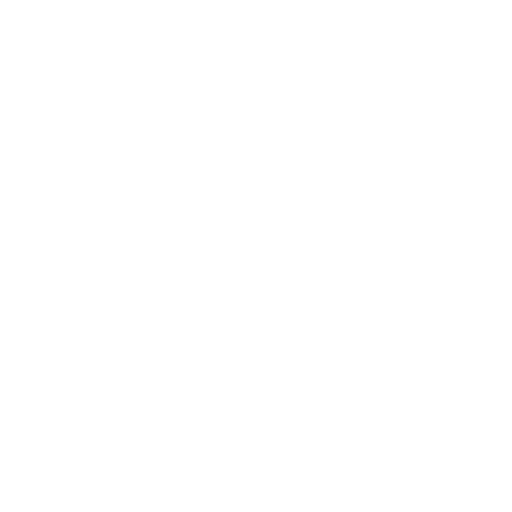

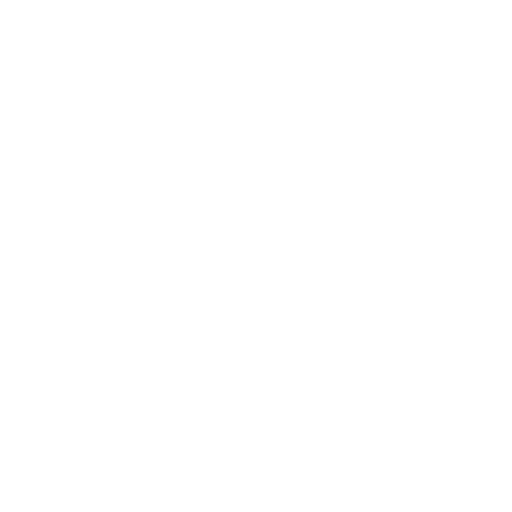

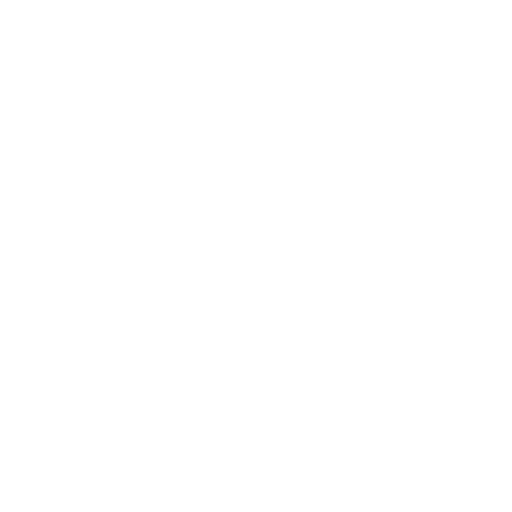

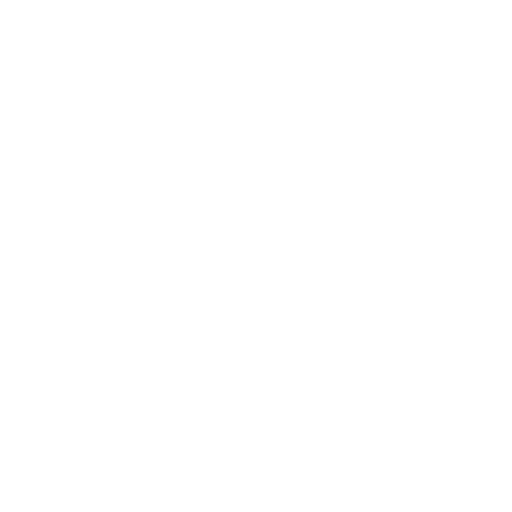

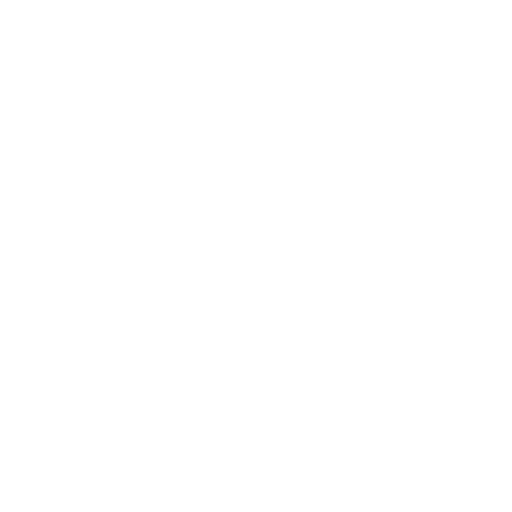

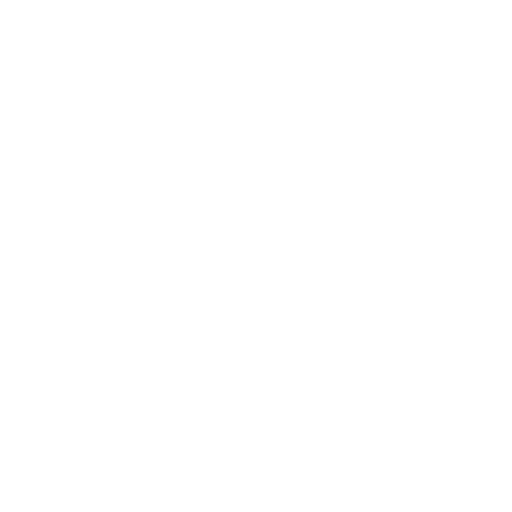

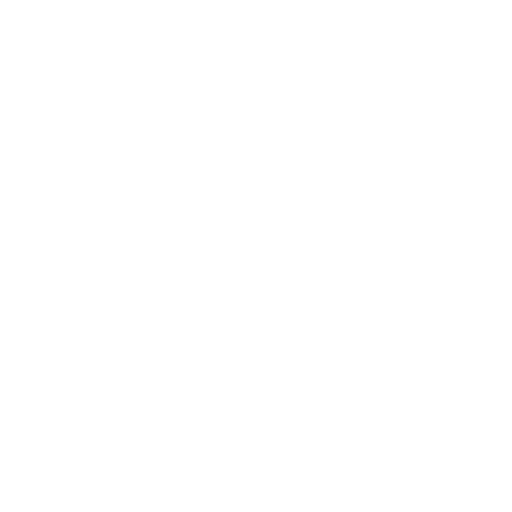

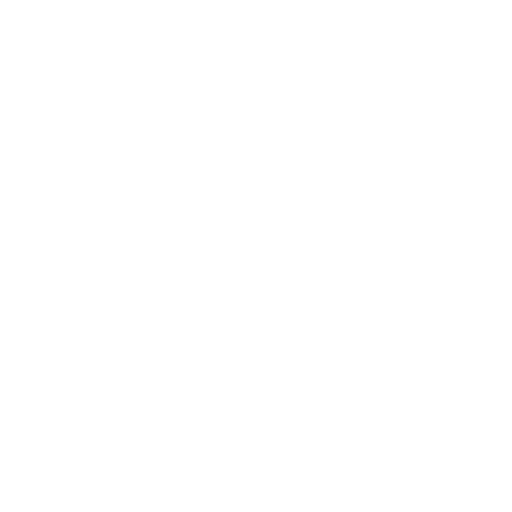

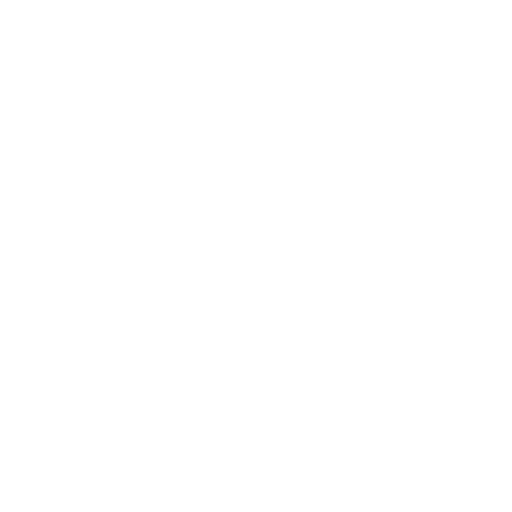

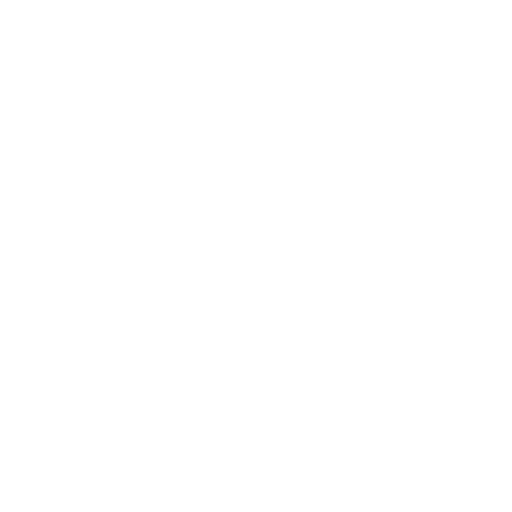

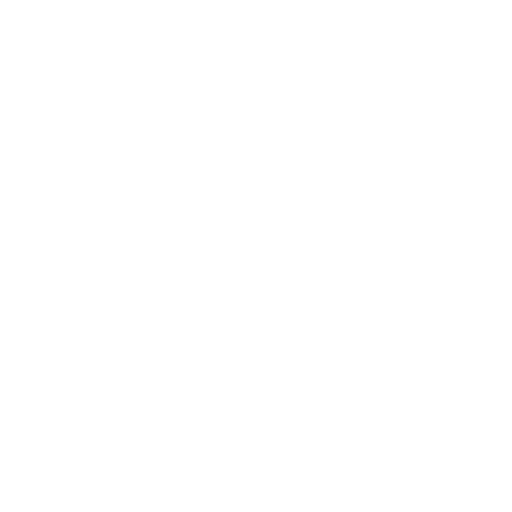

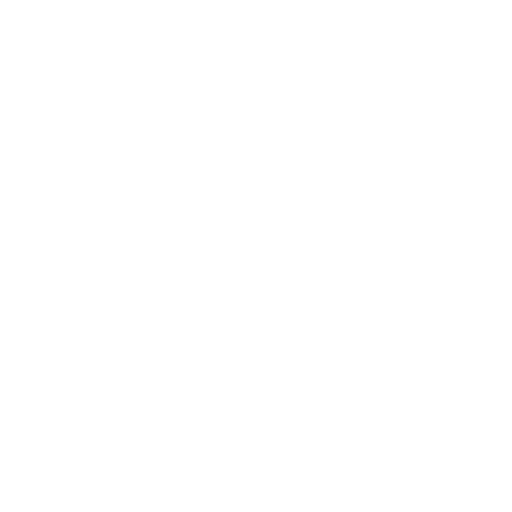

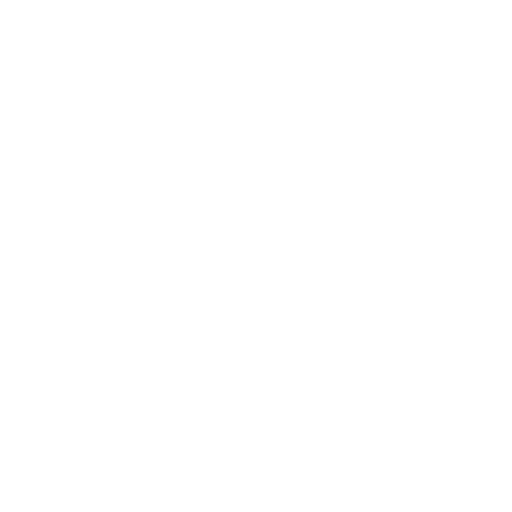

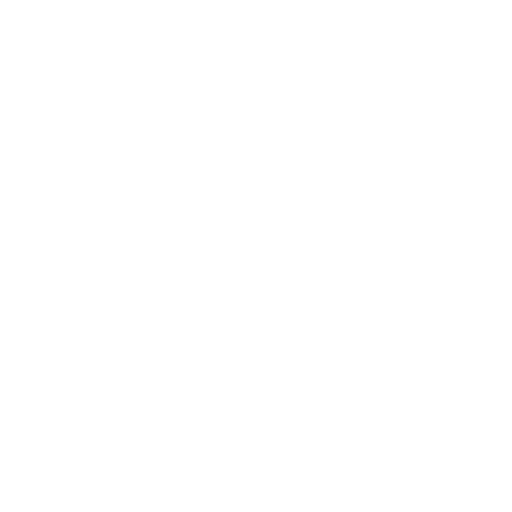

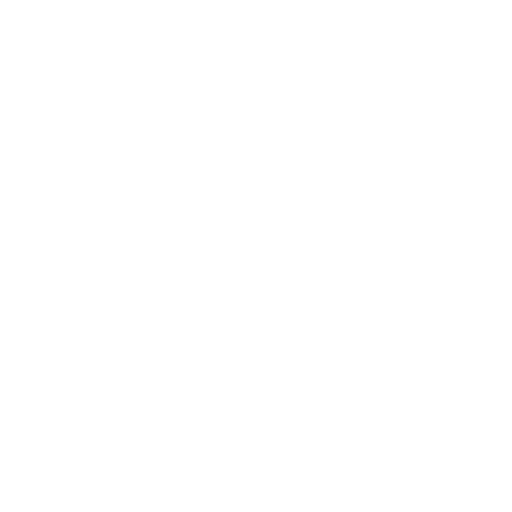

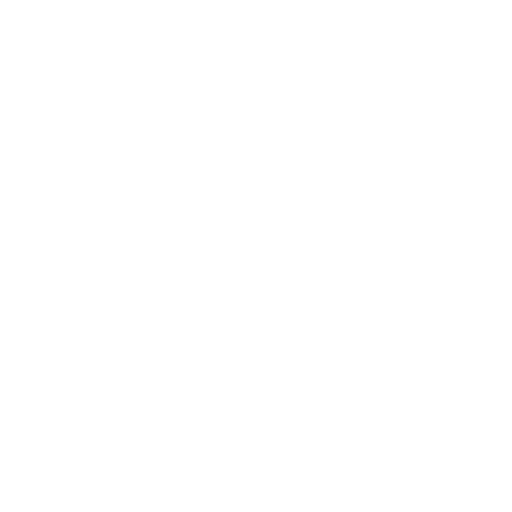

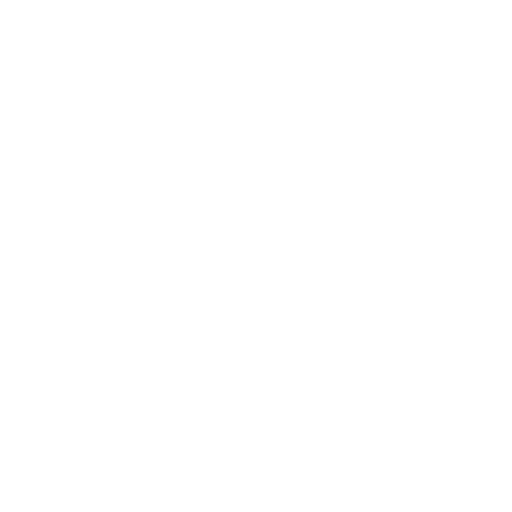

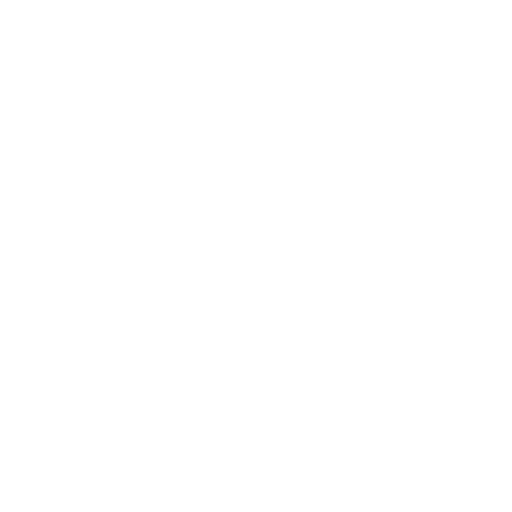

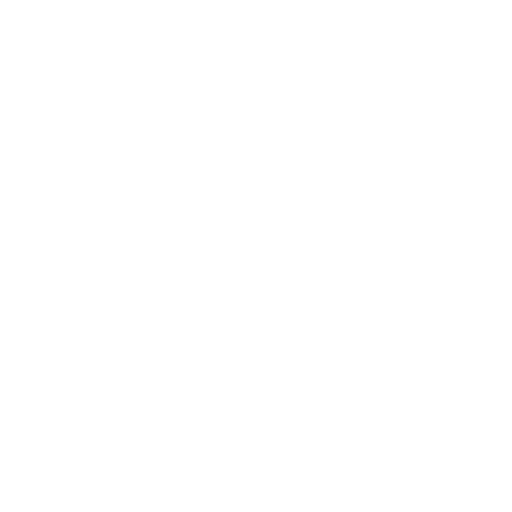

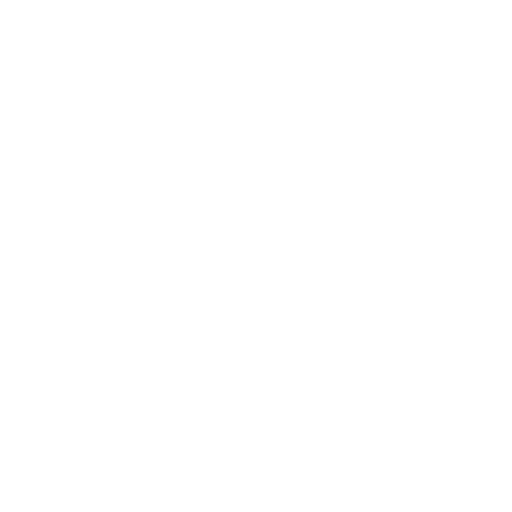

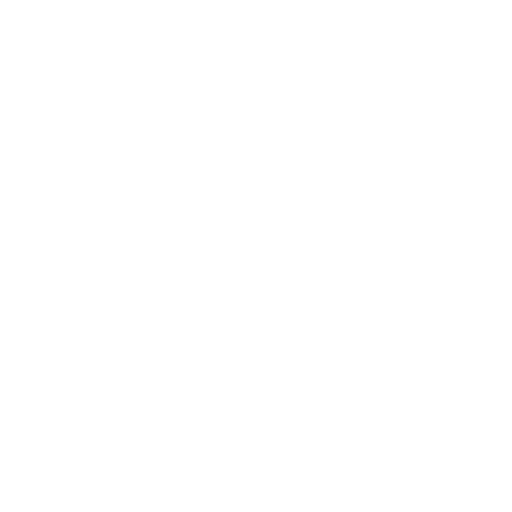

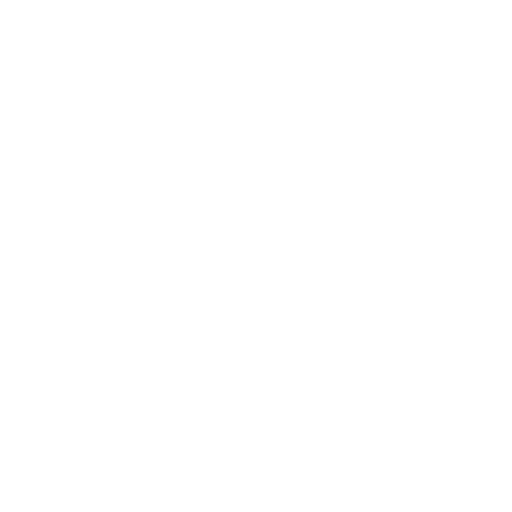

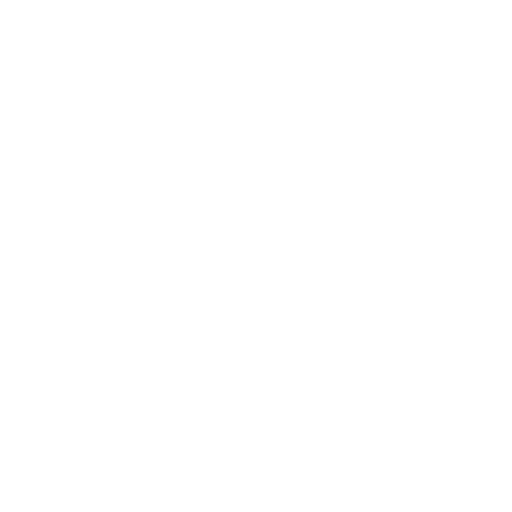

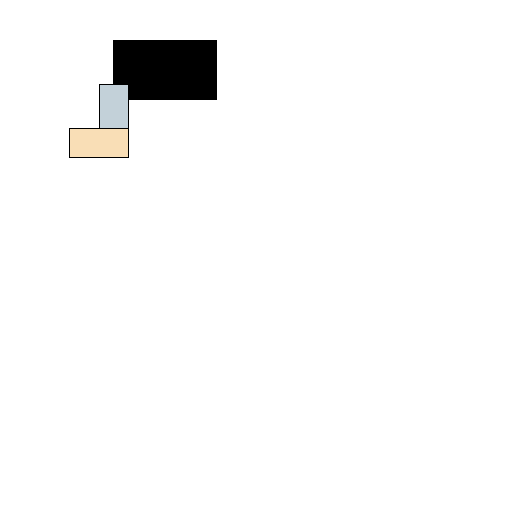

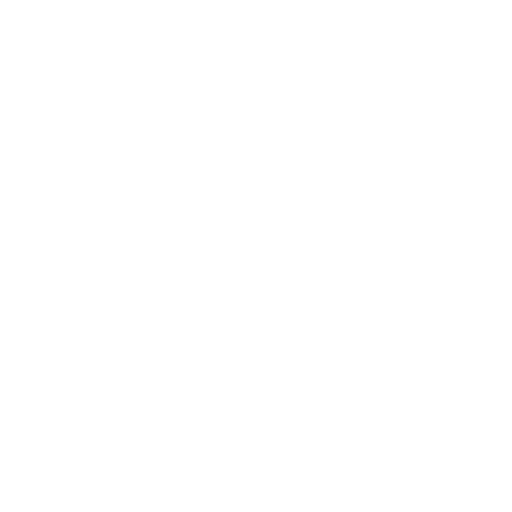

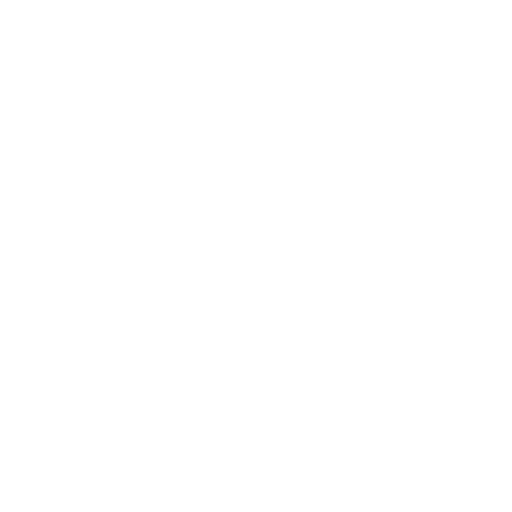

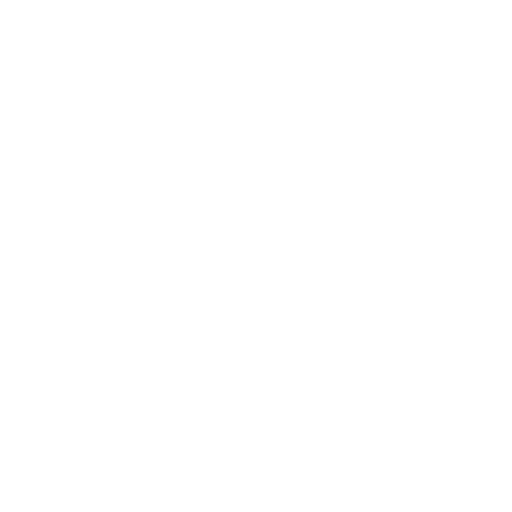

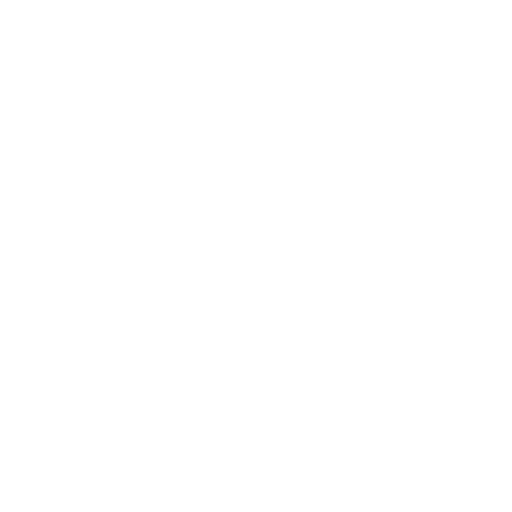

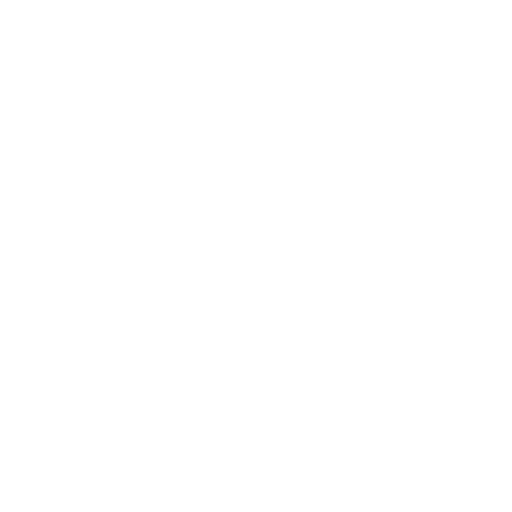

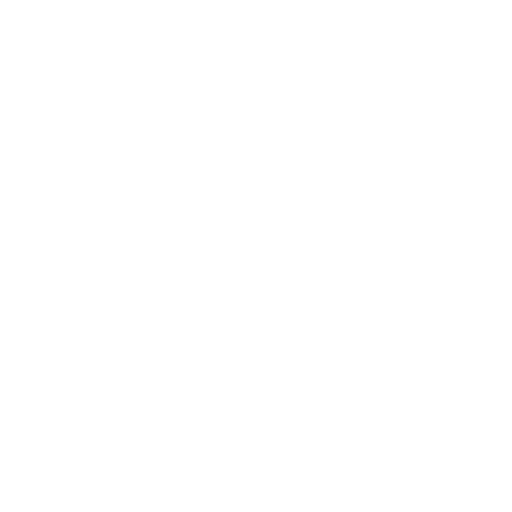

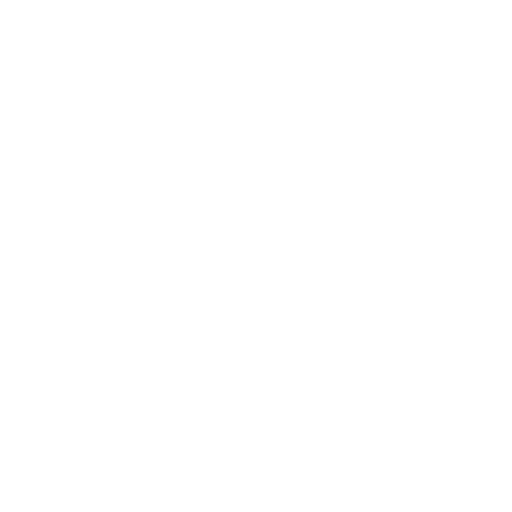

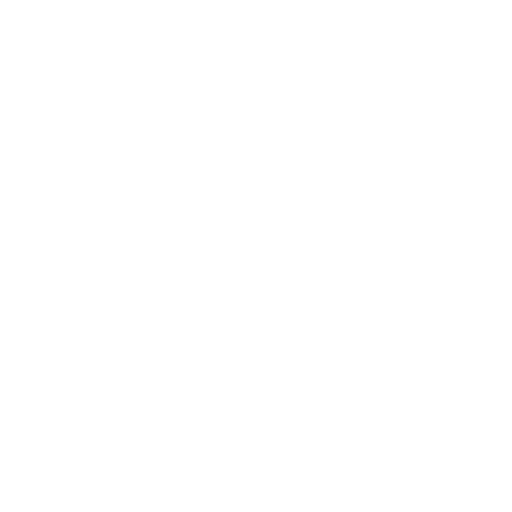

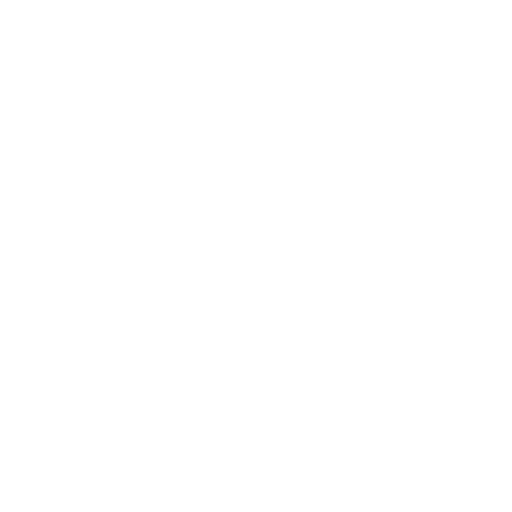

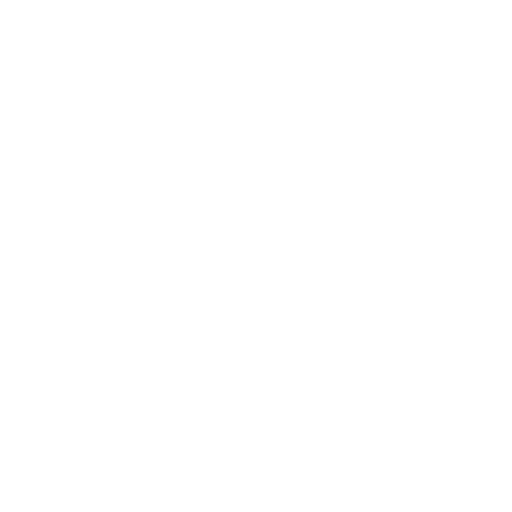

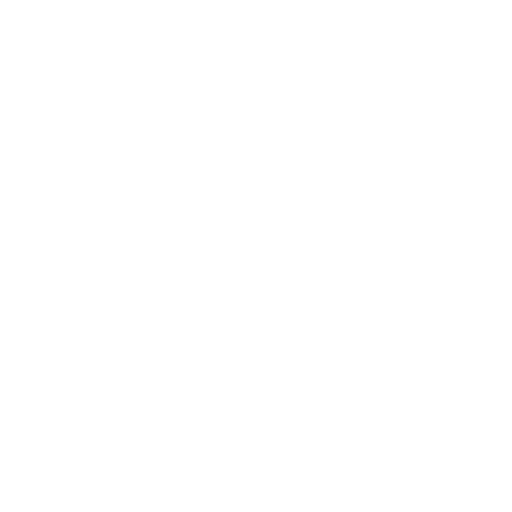

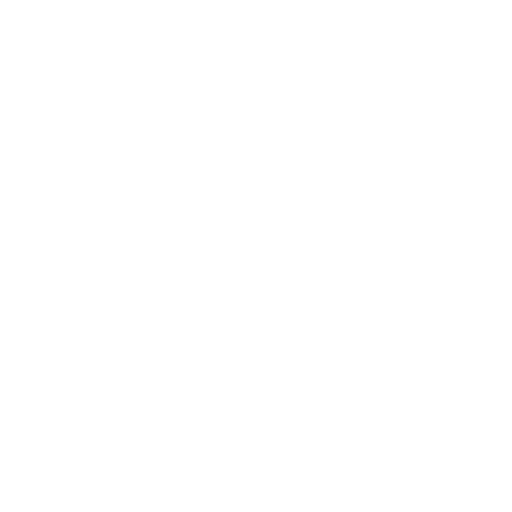

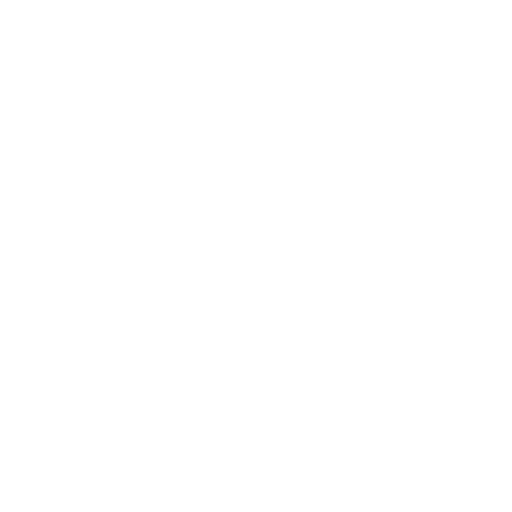

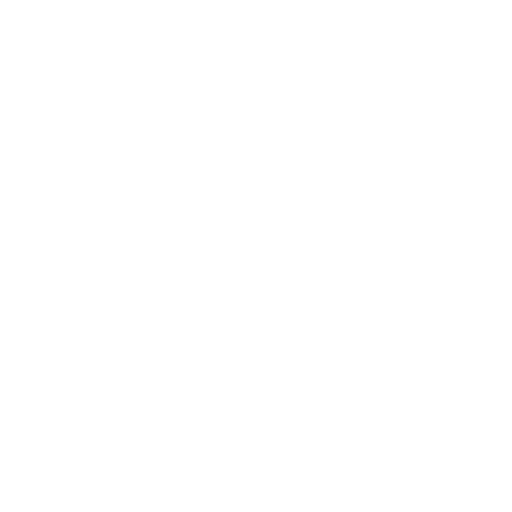

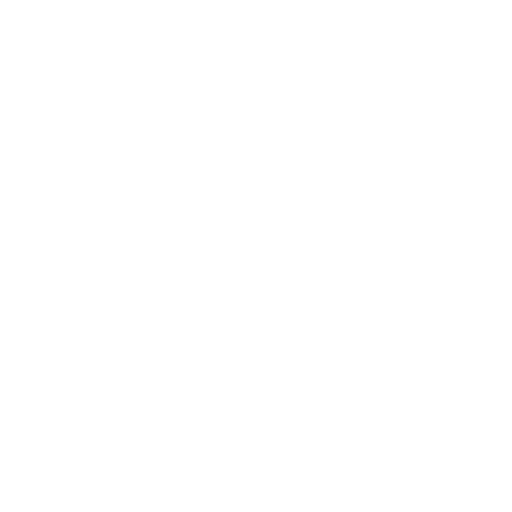

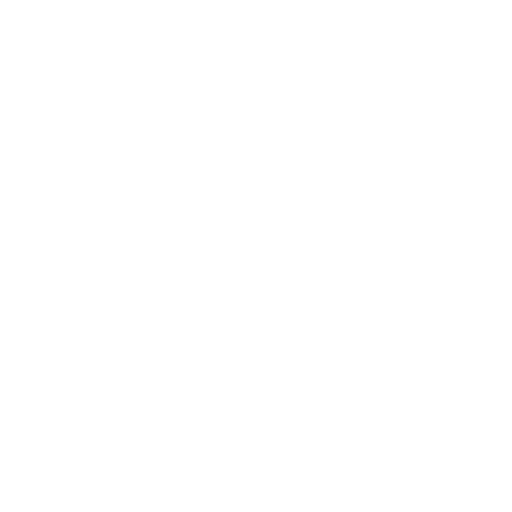

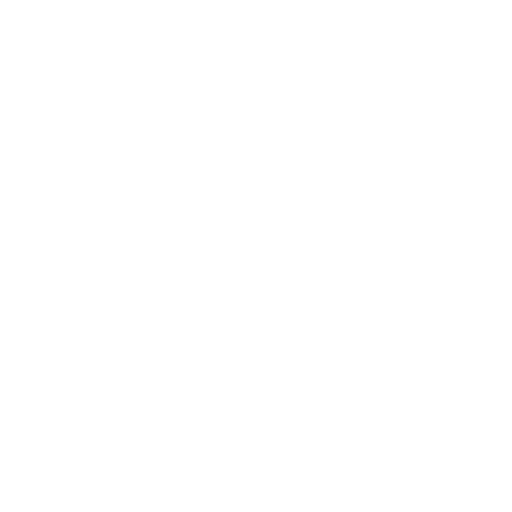

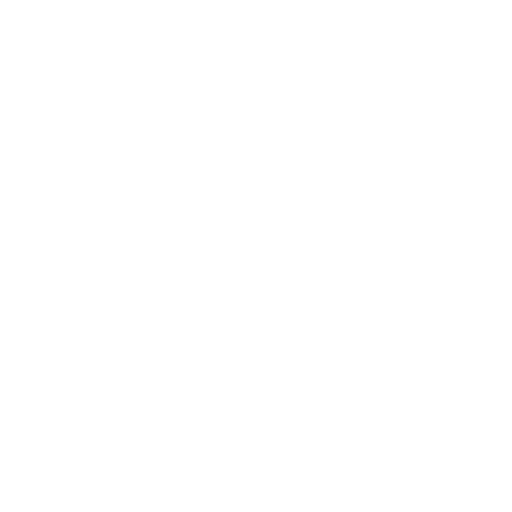

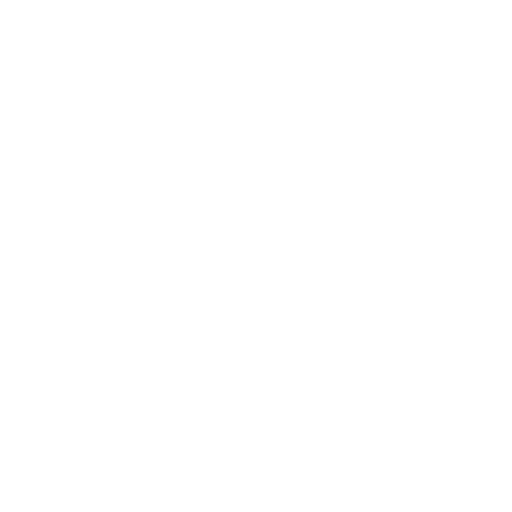

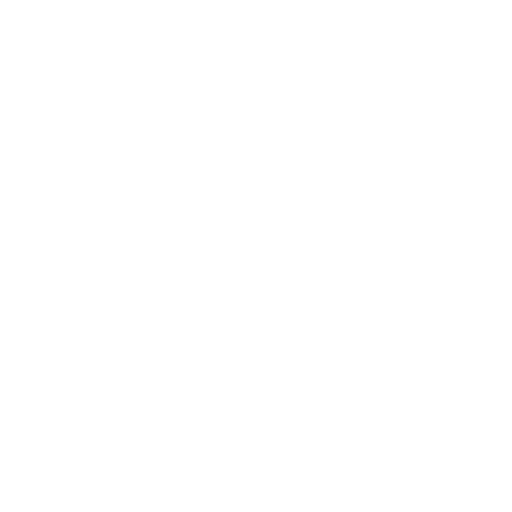

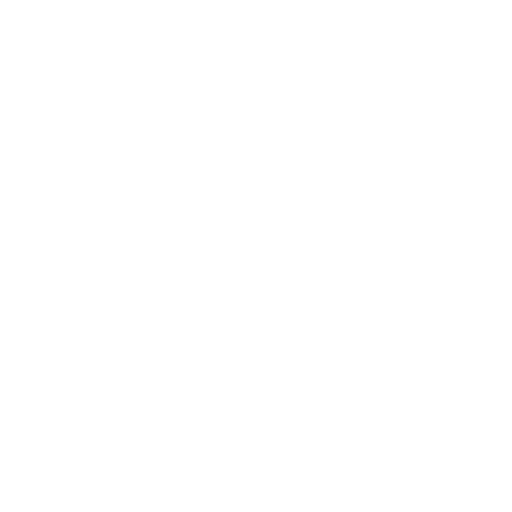

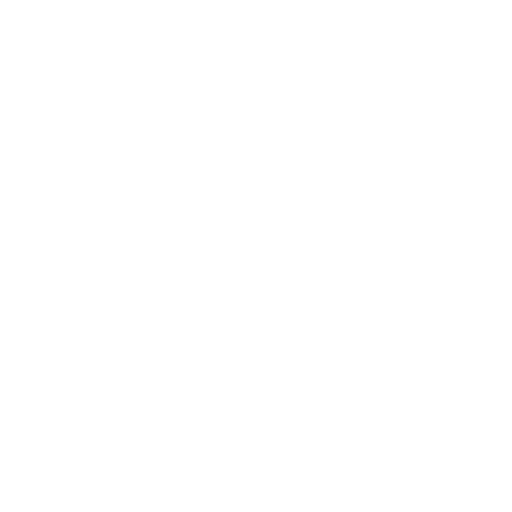

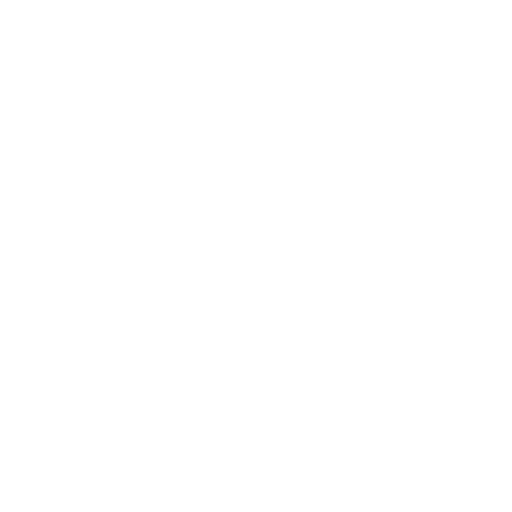

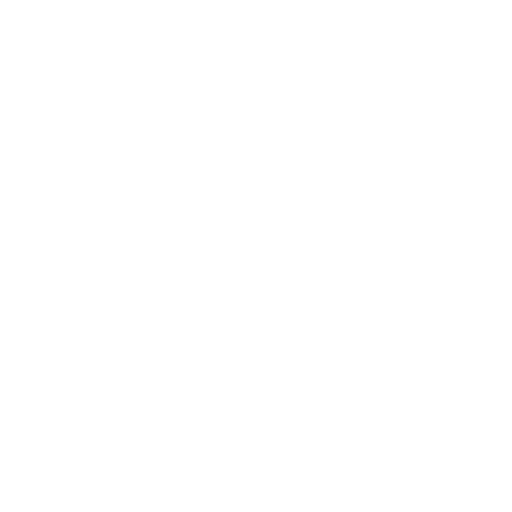

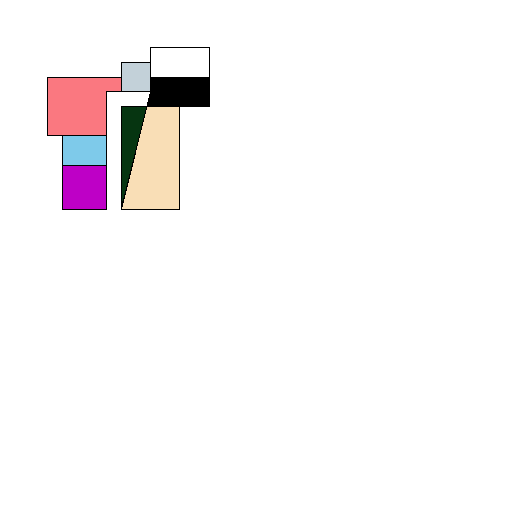

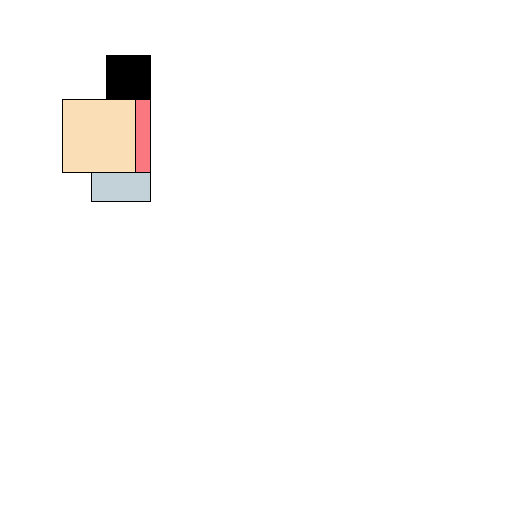

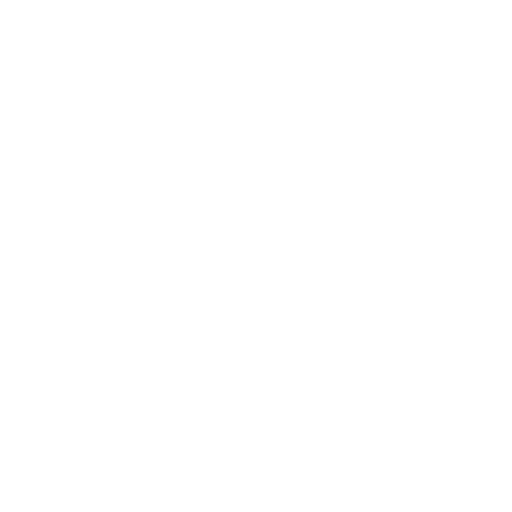

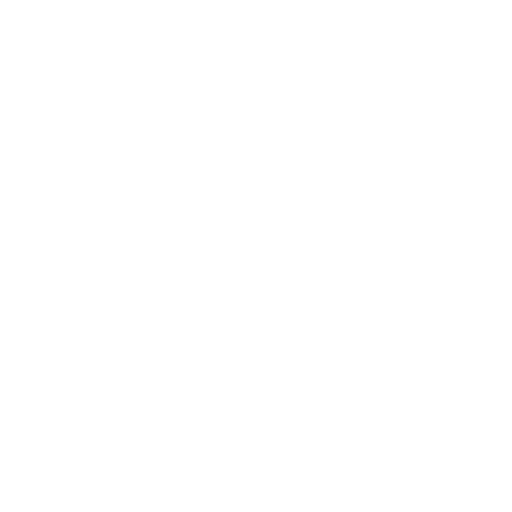

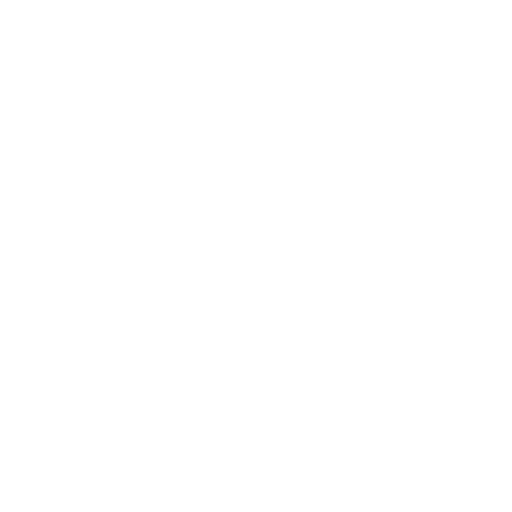

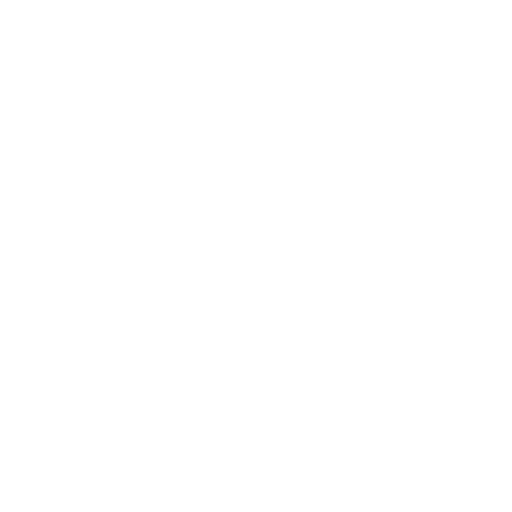

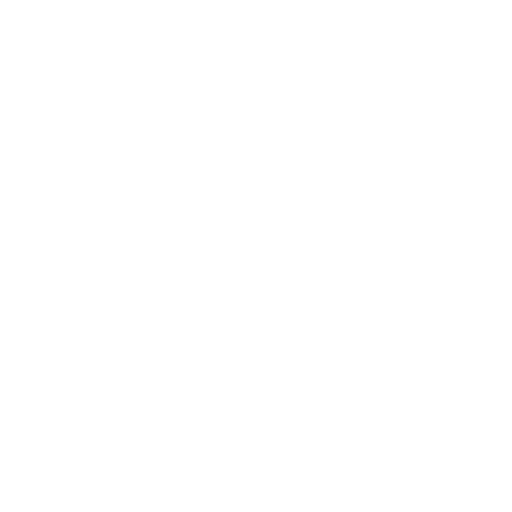

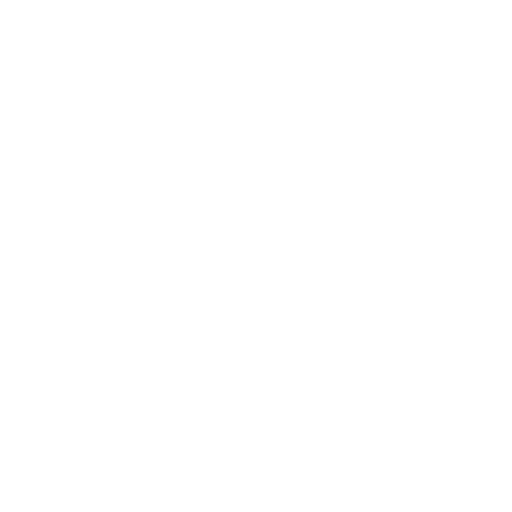

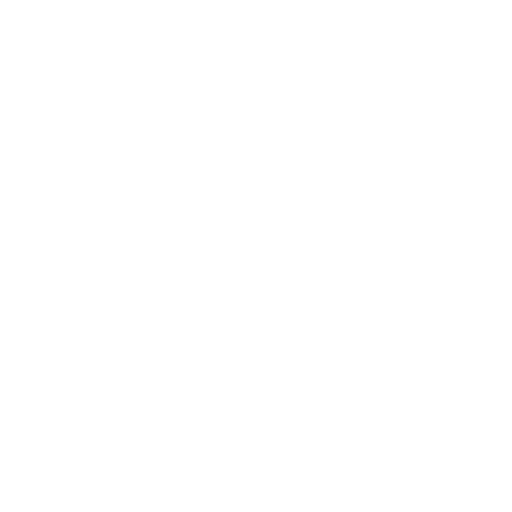

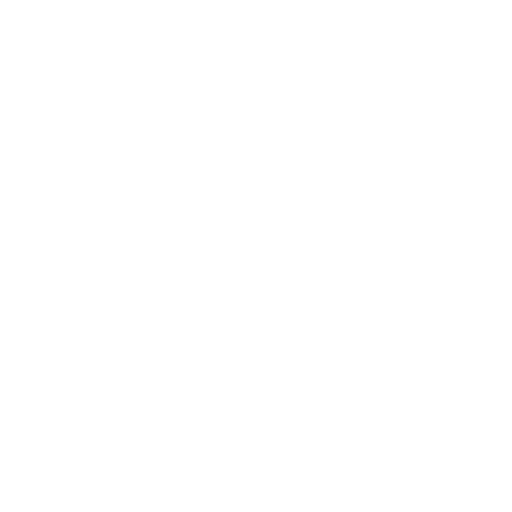

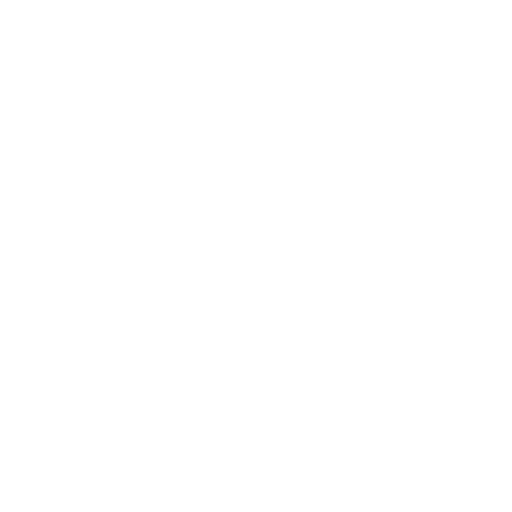

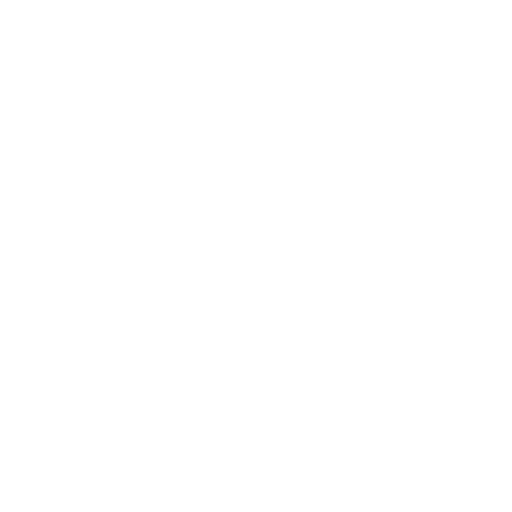

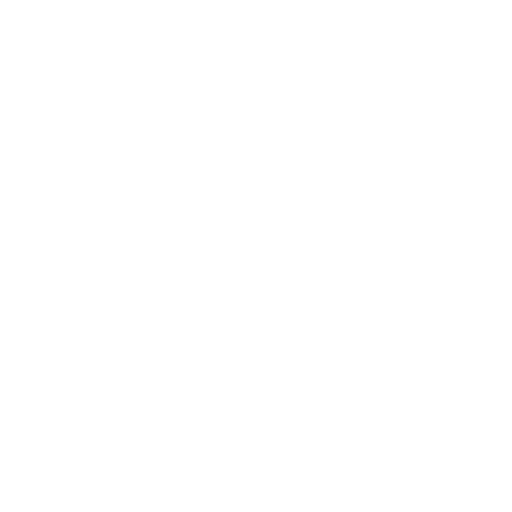

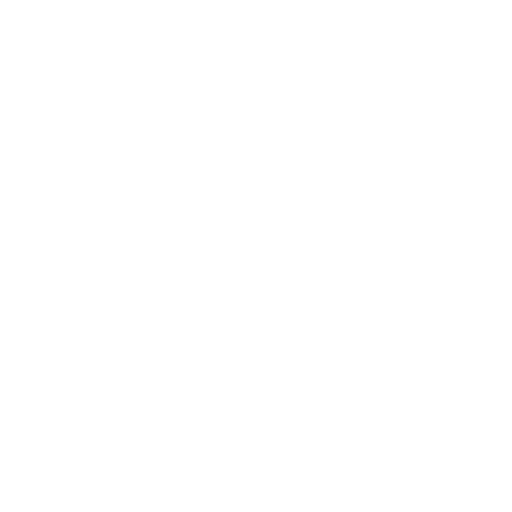

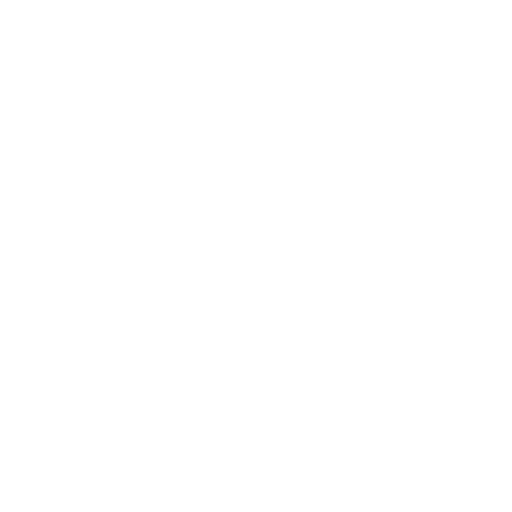

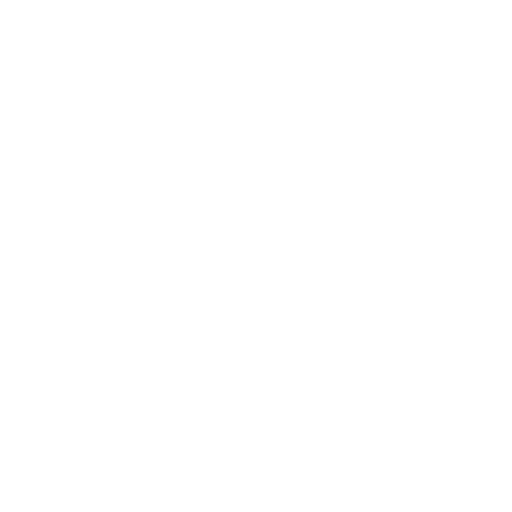

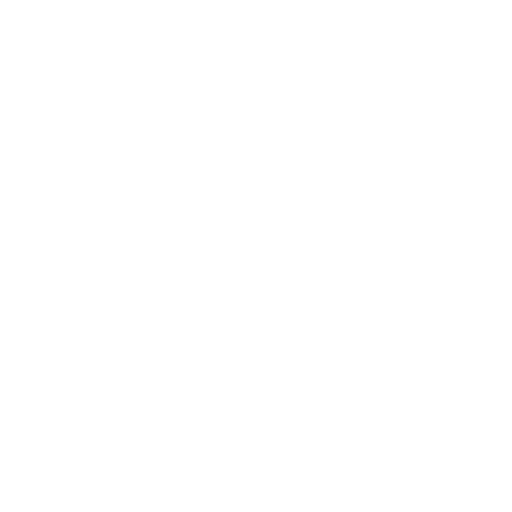

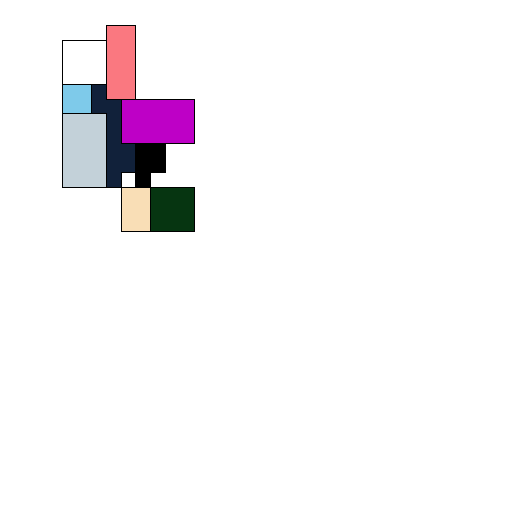

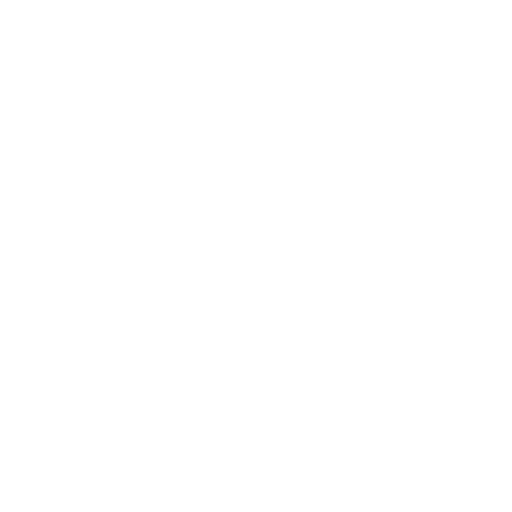

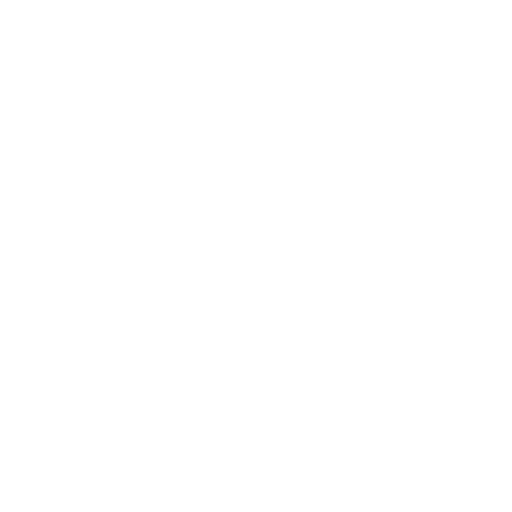

/tmp/ipykernel_4912/3859714711.py:31: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  mycoordslist = [list(x.exterior.coords) for x in small_poly]


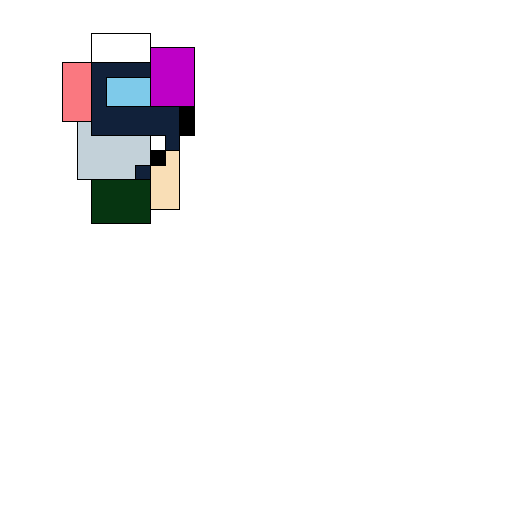

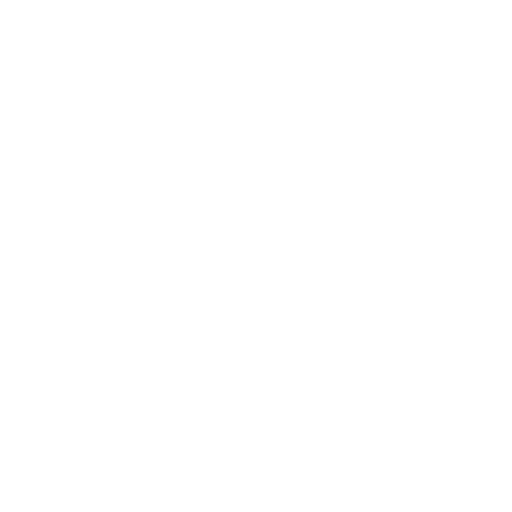

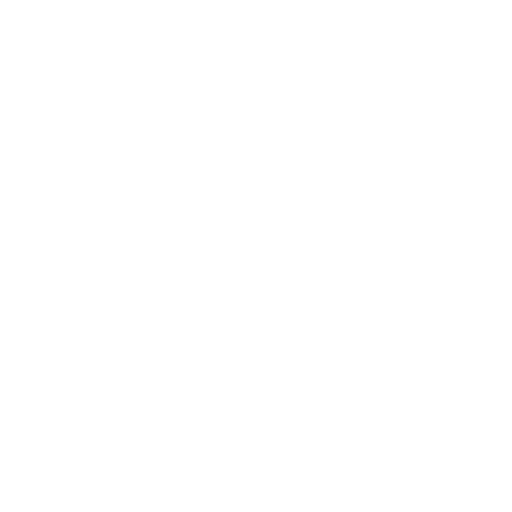

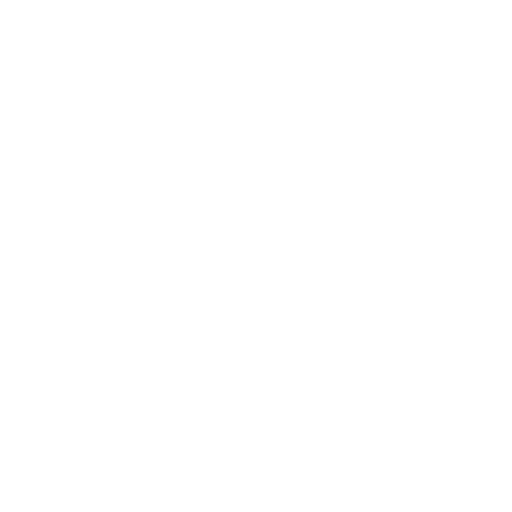

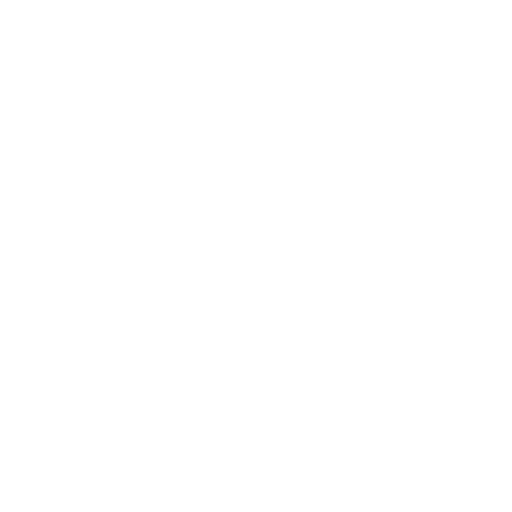

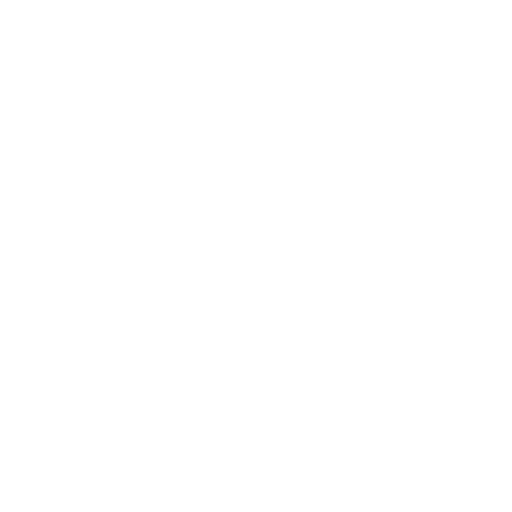

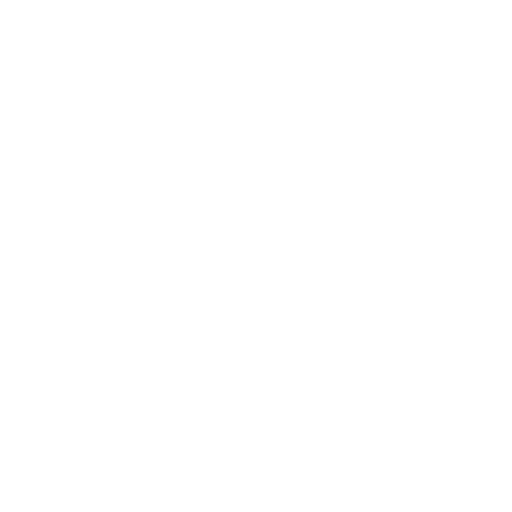

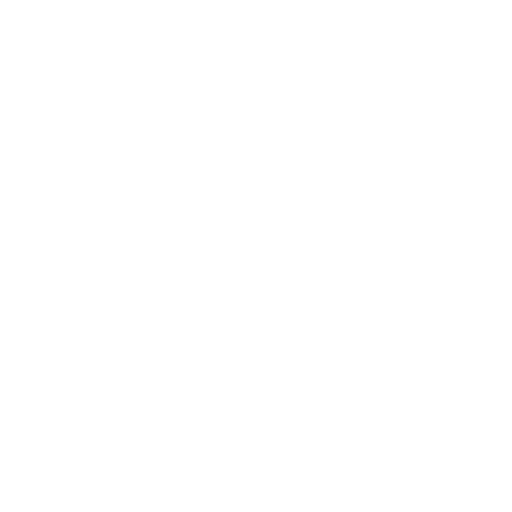

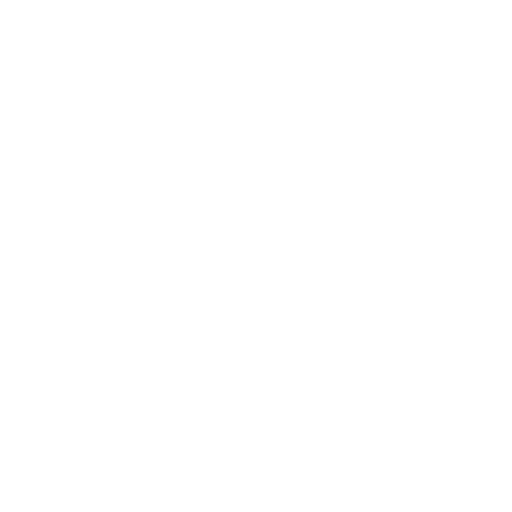

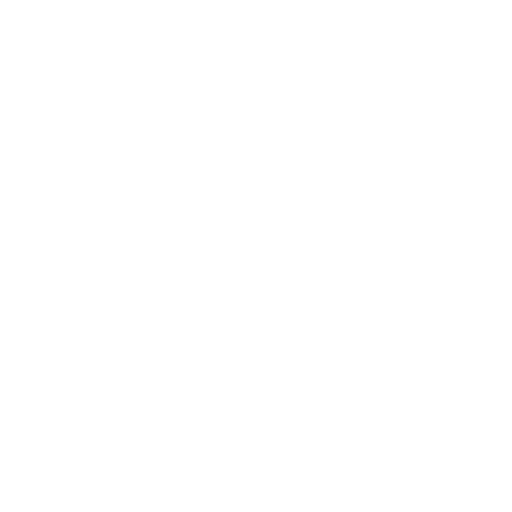

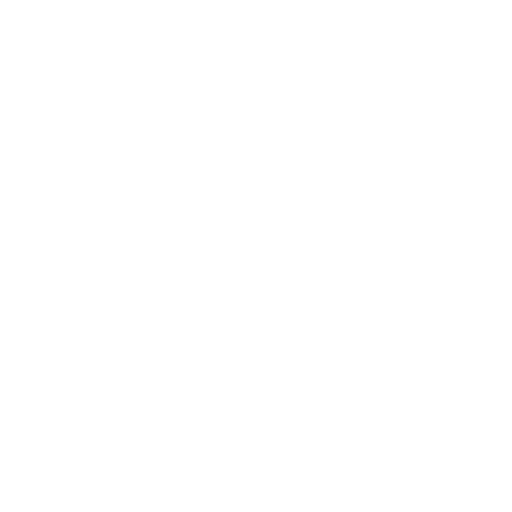

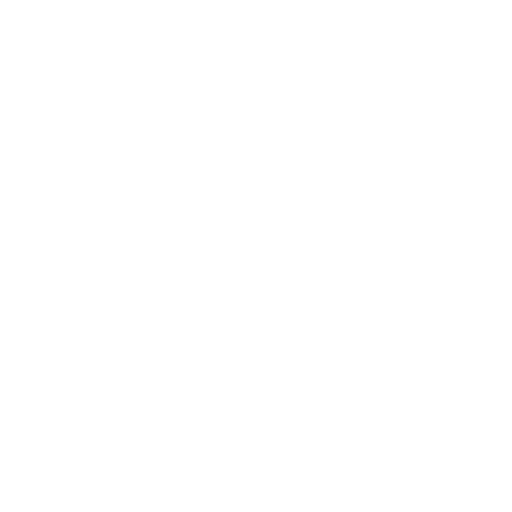

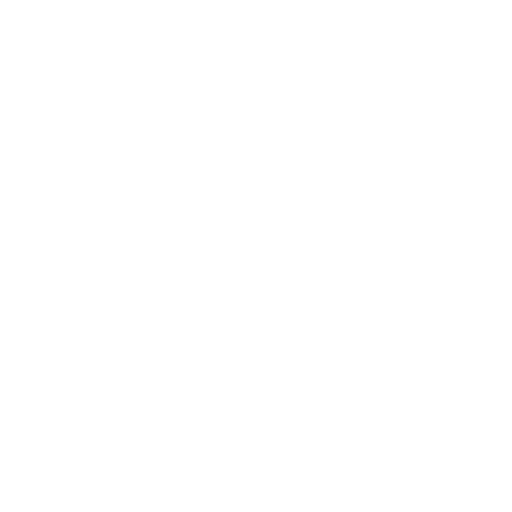

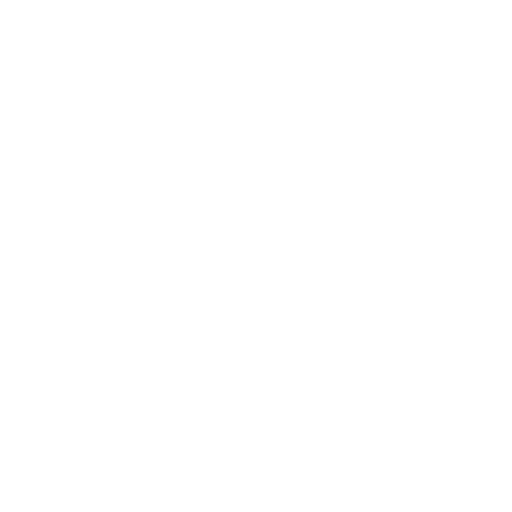

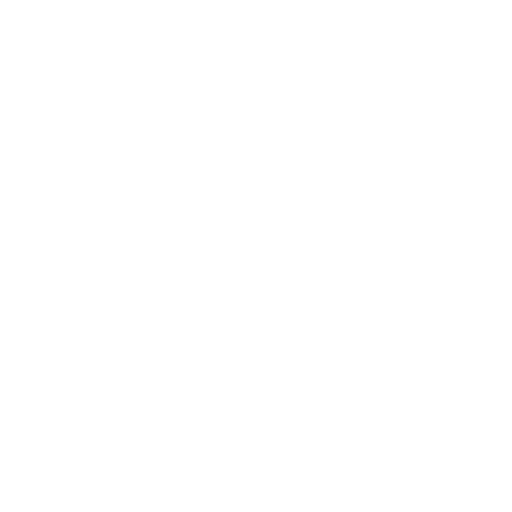

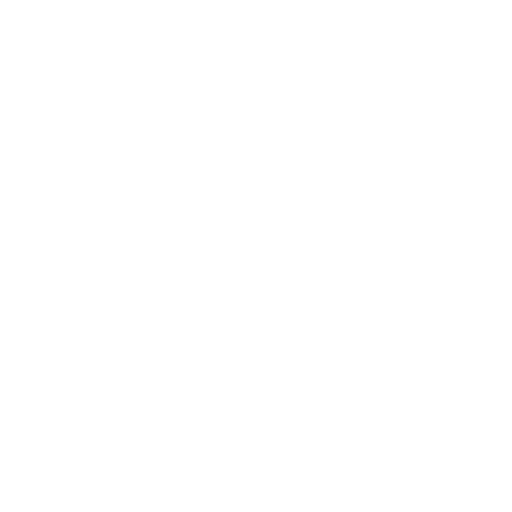

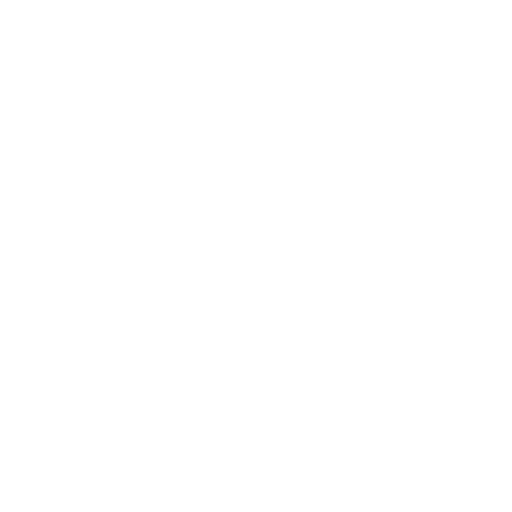

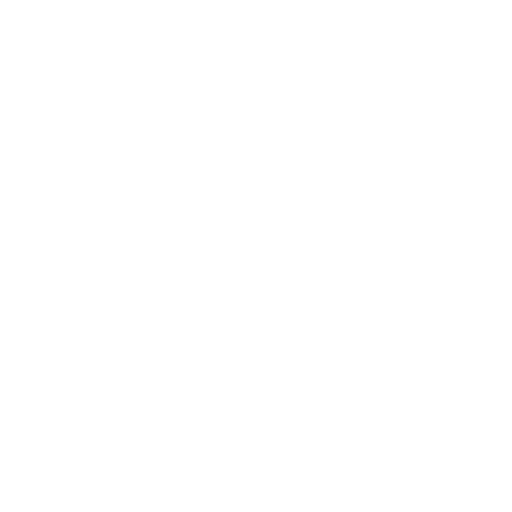

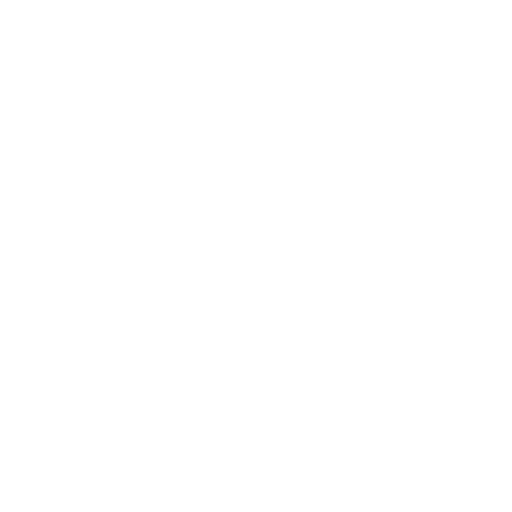

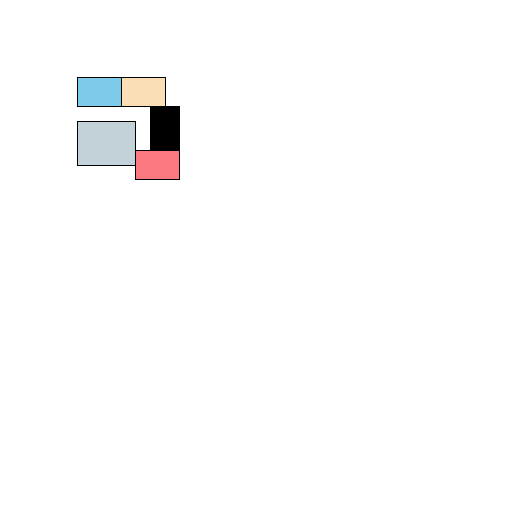

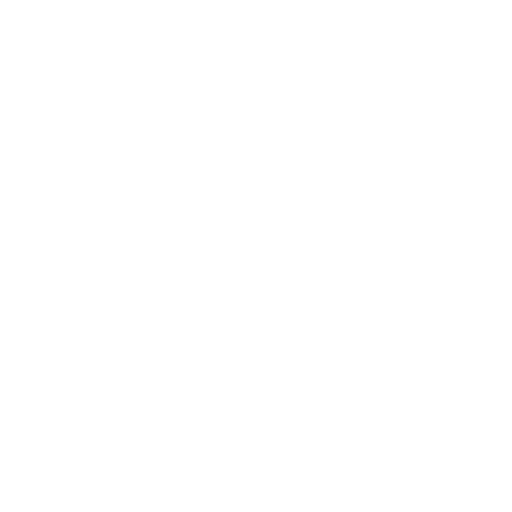

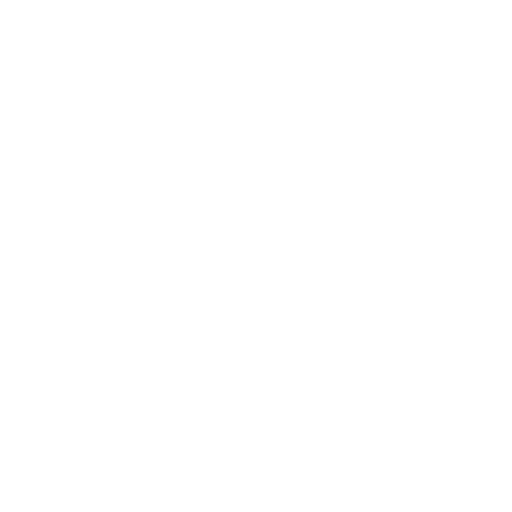

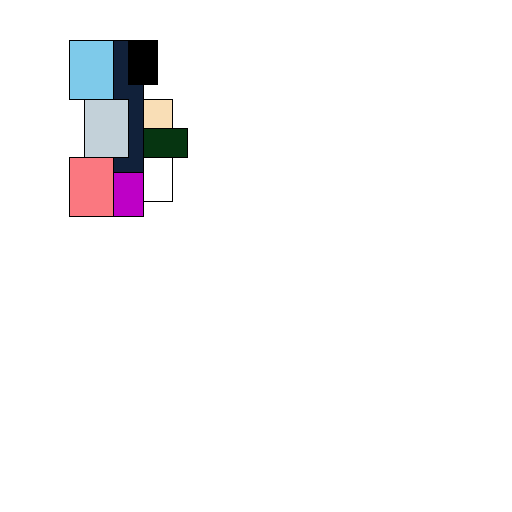

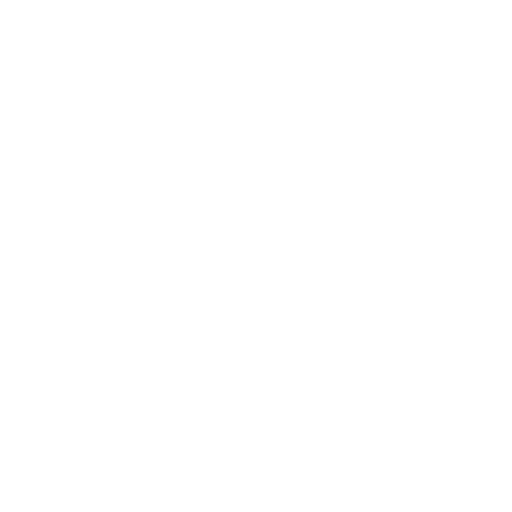

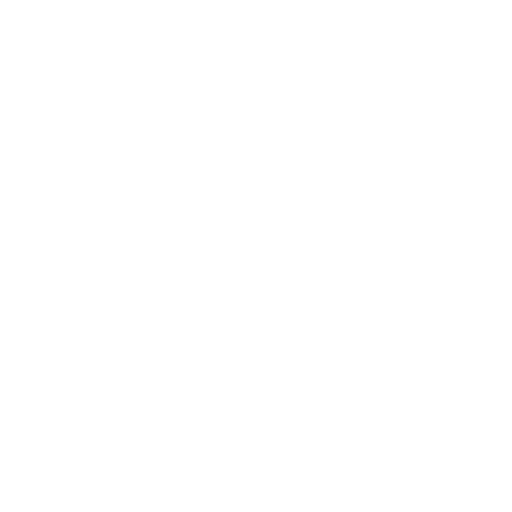

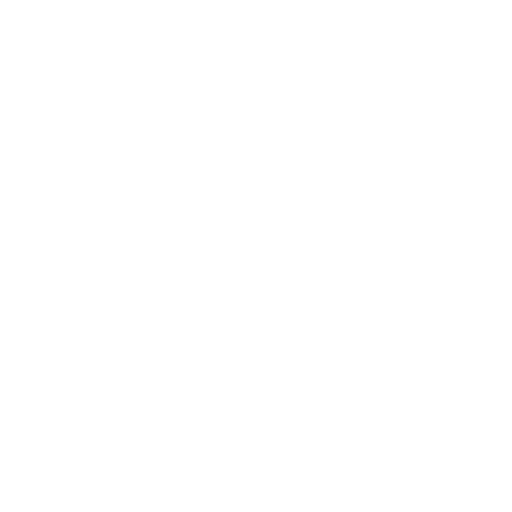

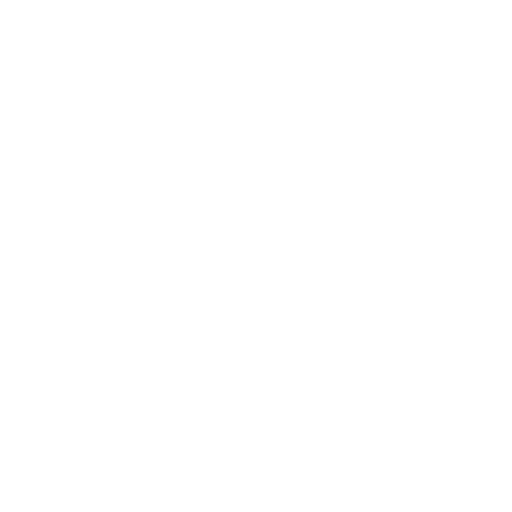

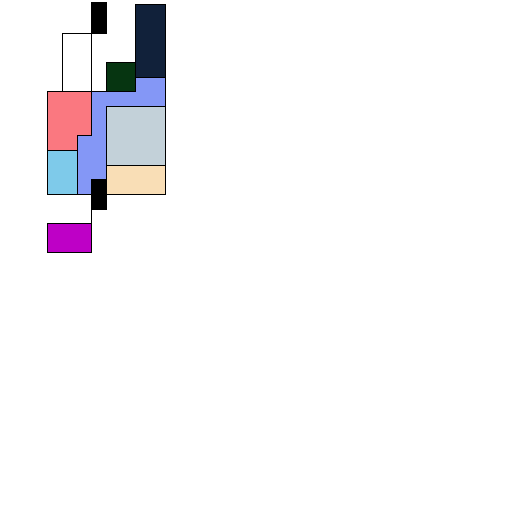

In [17]:
# Print invalid designs

for x in elites.recycled[:elites.recycled_count]:
    #print(e.layout)
    try:
        display(x.get_image())
    except:
        pass

In [60]:
elites.old_elites

[(0, 0),
 (0, 0),
 (0, 0),
 (0, <__main__.ArchitextGenotype at 0x7f799df608e0>),
 (0, <__main__.ArchitextGenotype at 0x7f799df60ac0>),
 (0, 0),
 (0, 0),
 (0, <__main__.ArchitextGenotype at 0x7f799df60850>),
 (0, 0),
 (0, <__main__.ArchitextGenotype at 0x7f799df60f70>),
 (0, 0),
 (0, <__main__.ArchitextGenotype at 0x7f799df60c40>),
 (0, 0),
 (0, <__main__.ArchitextGenotype at 0x7f799df60b50>),
 (0, <__main__.ArchitextGenotype at 0x7f799df60dc0>),
 (0, <__main__.ArchitextGenotype at 0x7f799df60c10>),
 (0, <__main__.ArchitextGenotype at 0x7f799df60f40>),
 (1, 0),
 (1, 0),
 (1, 0),
 (1, <__main__.ArchitextGenotype at 0x7f799df5c400>),
 (1, <__main__.ArchitextGenotype at 0x7f799df5c5b0>),
 (1, 0),
 (1, <__main__.ArchitextGenotype at 0x7f799df5c8e0>),
 (1, <__main__.ArchitextGenotype at 0x7f799df5c730>),
 (1, <__main__.ArchitextGenotype at 0x7f799df60460>),
 (1, <__main__.ArchitextGenotype at 0x7f799df5c790>),
 (1, <__main__.ArchitextGenotype at 0x7f799df60d90>),
 (1, 0),
 (1, <__main__.Arch

In [12]:
trajectory = [x[7,0] for x in elites.history]

0


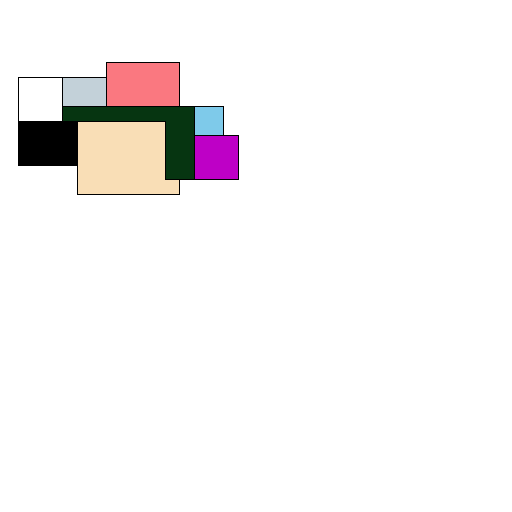

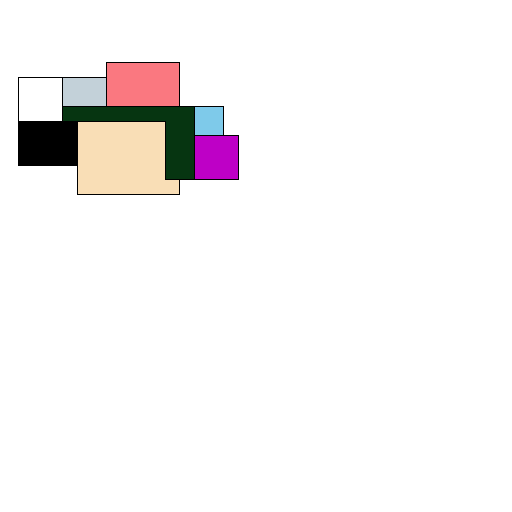

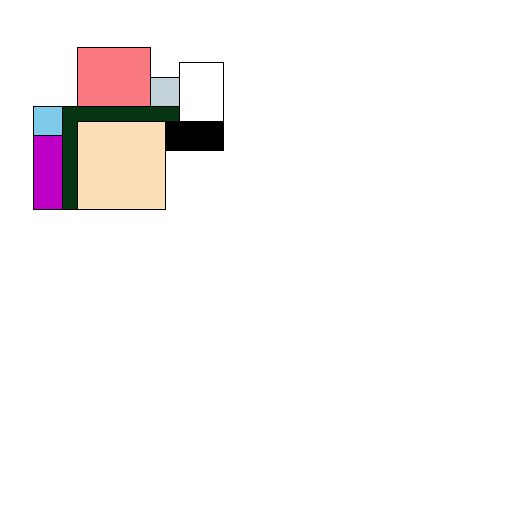

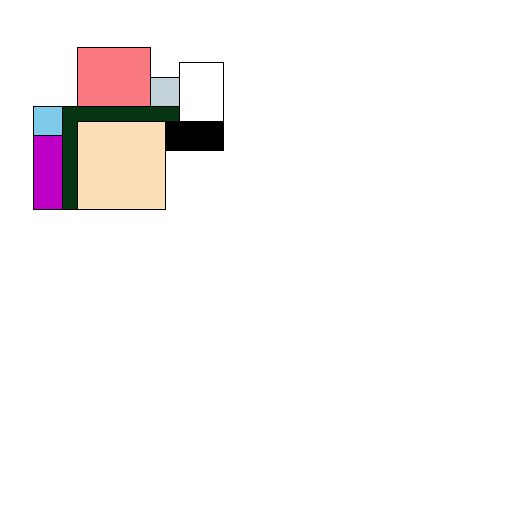

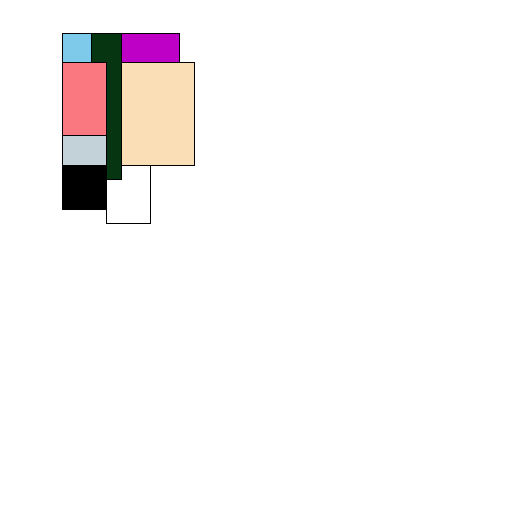

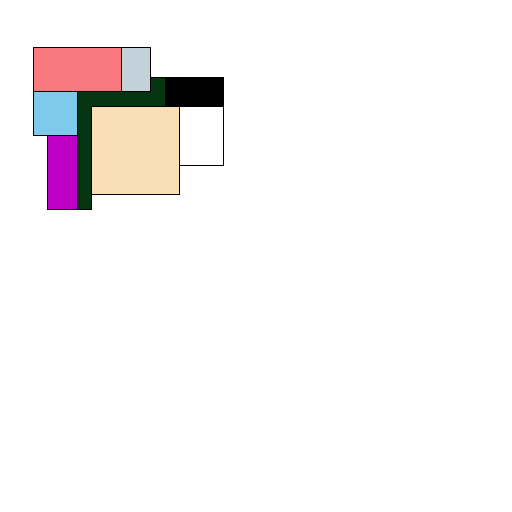

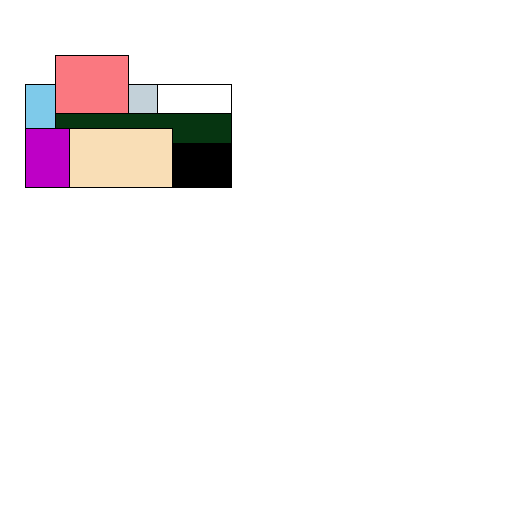

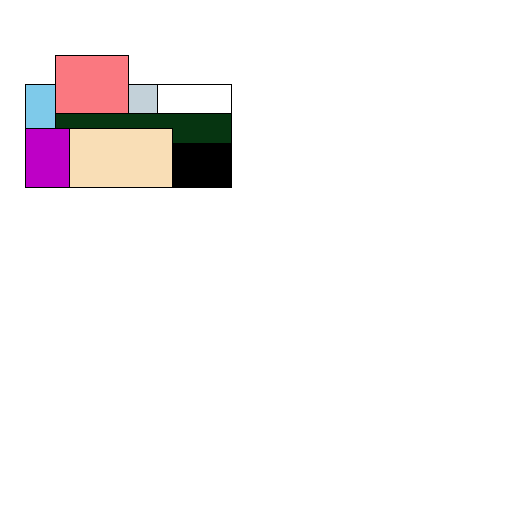

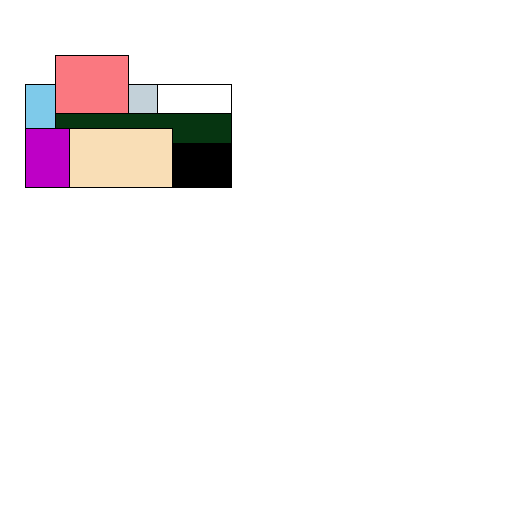

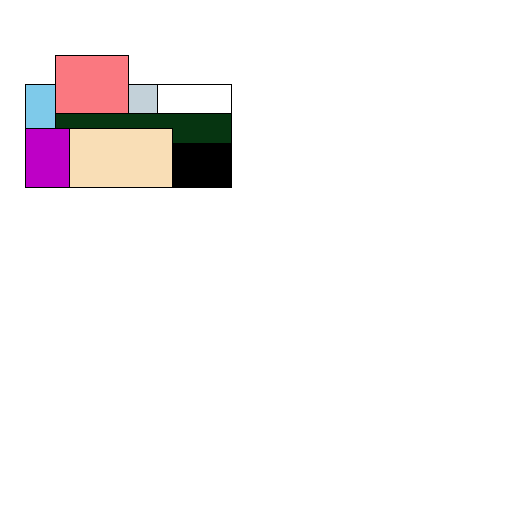

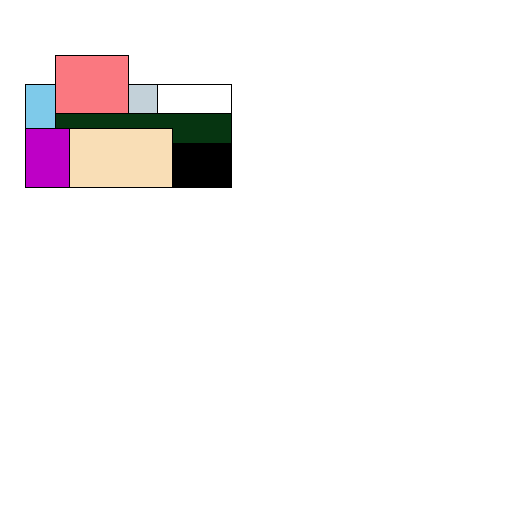

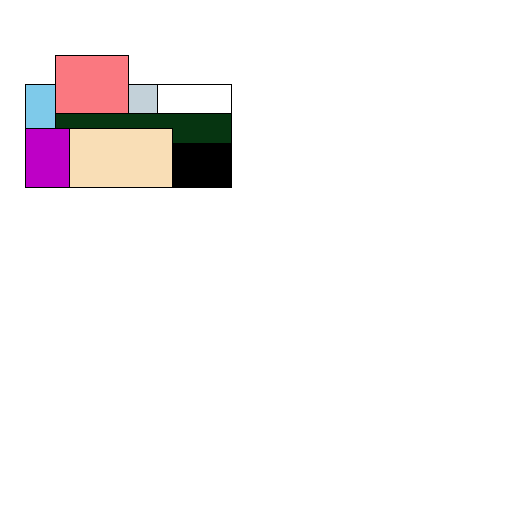

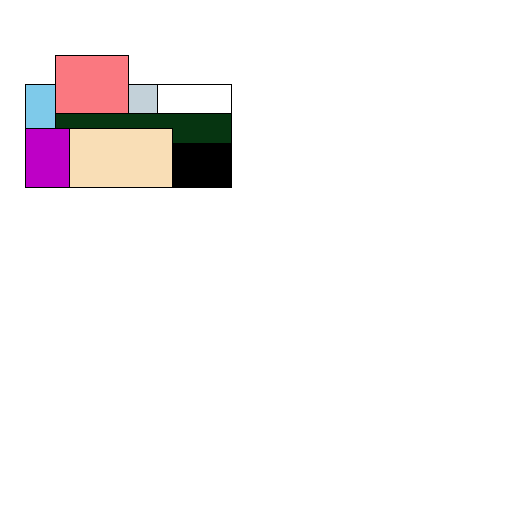

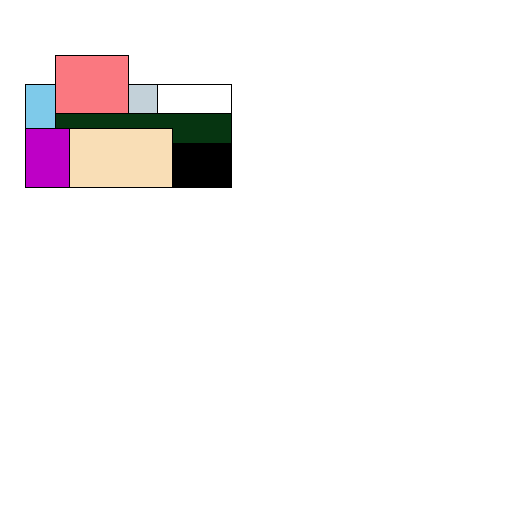

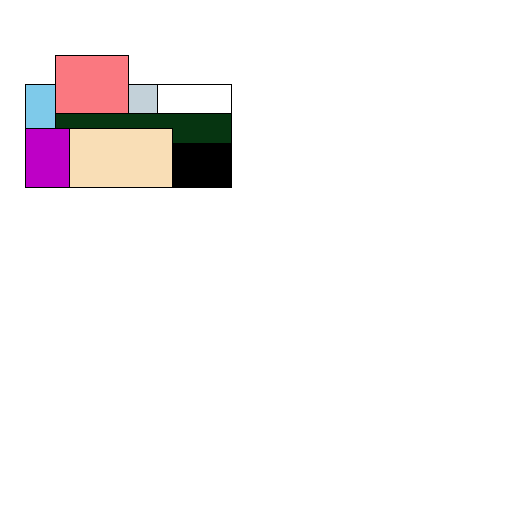

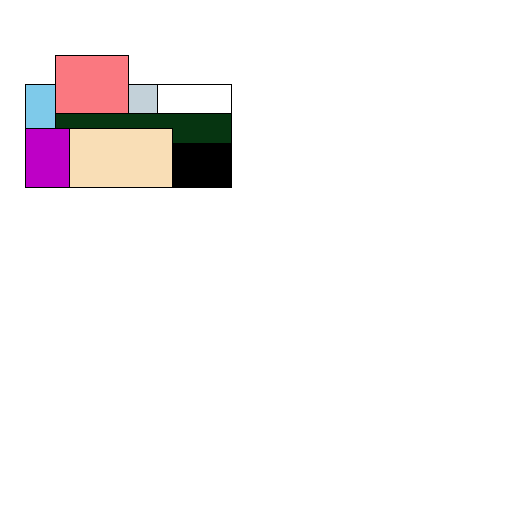

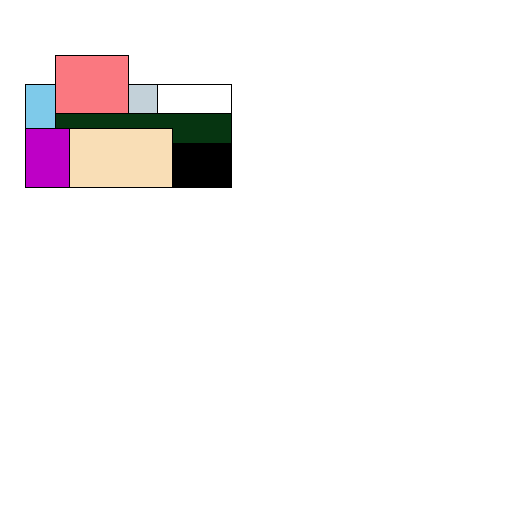

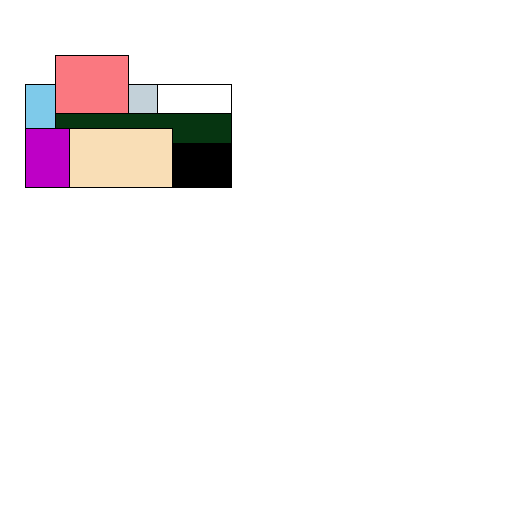

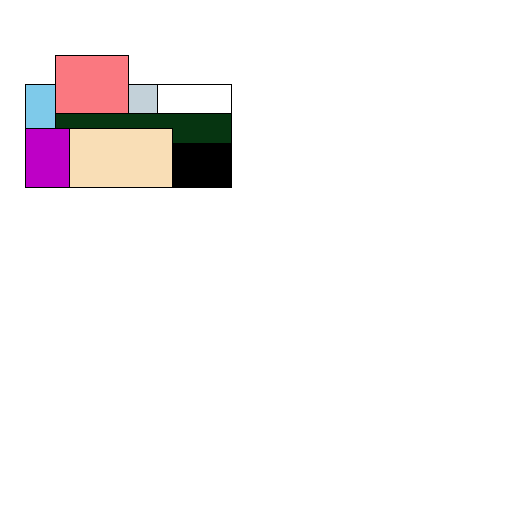

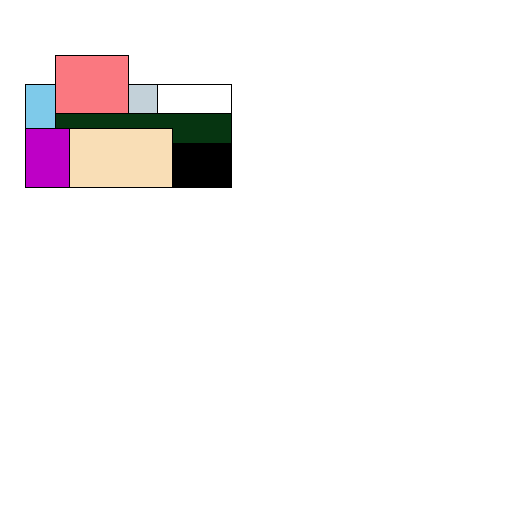

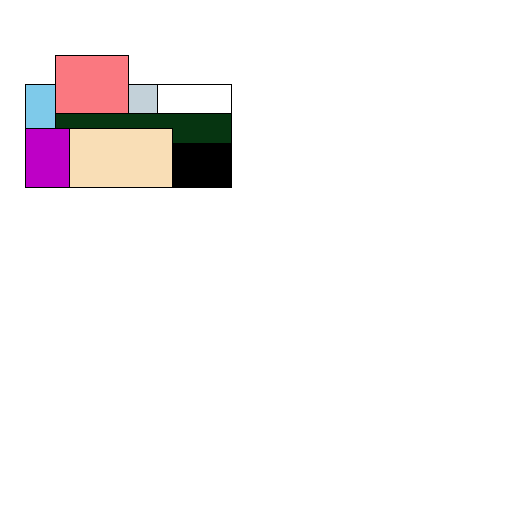

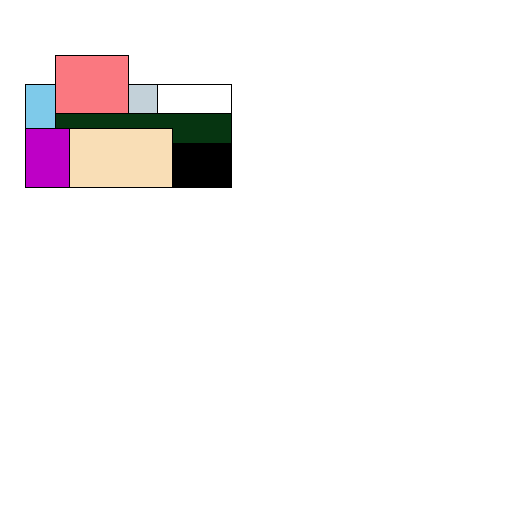

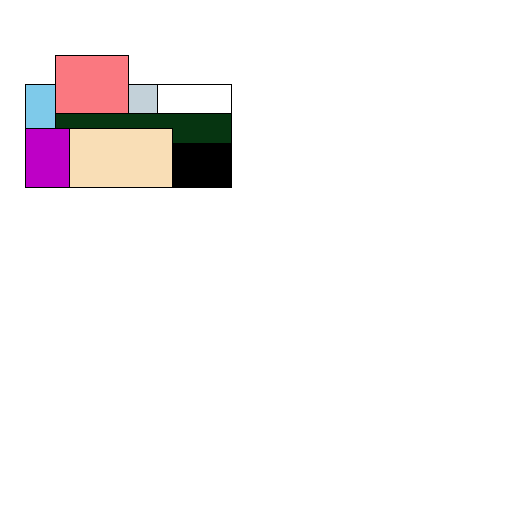

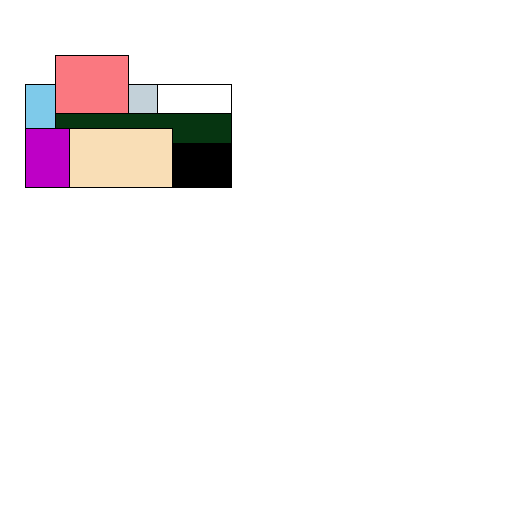

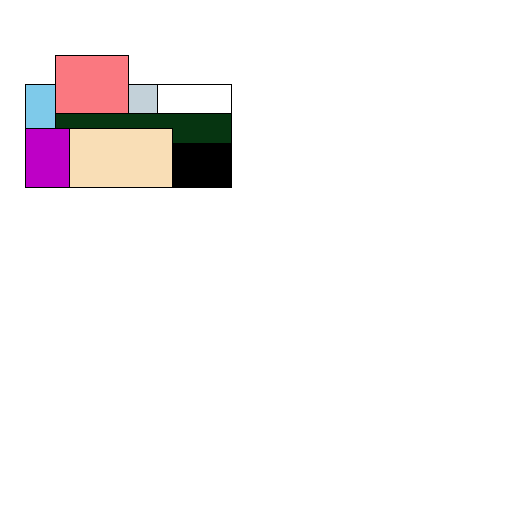

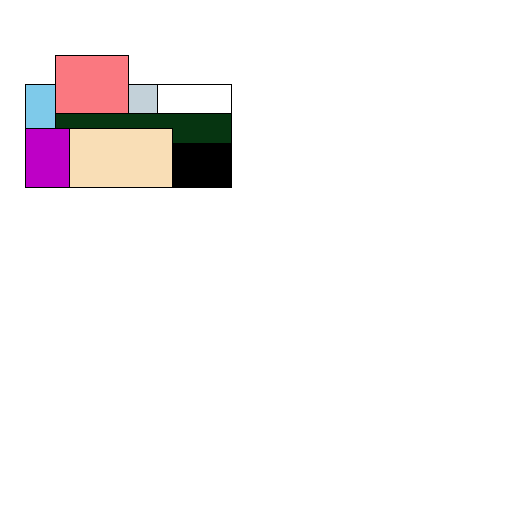

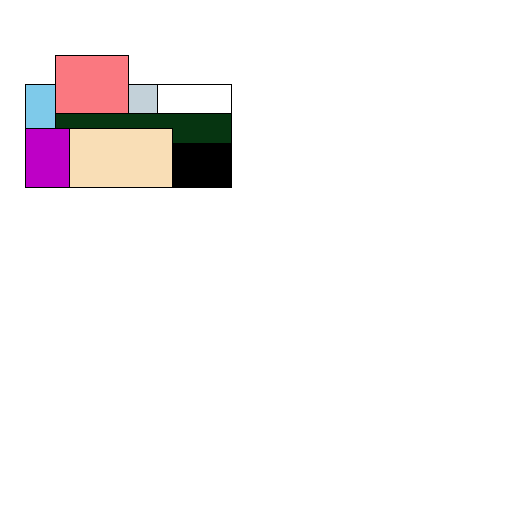

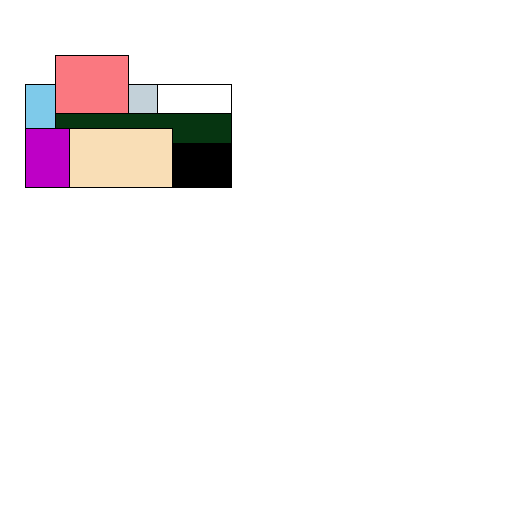

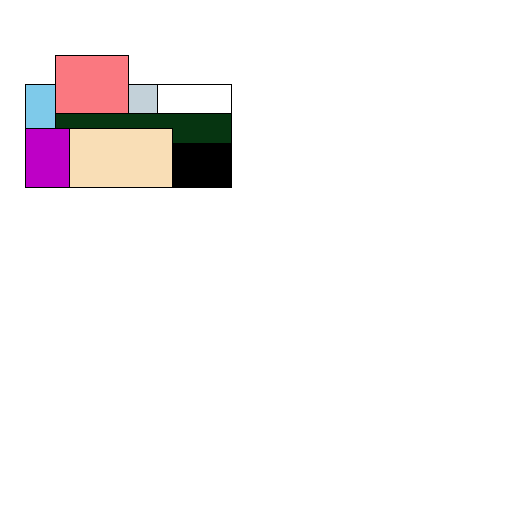

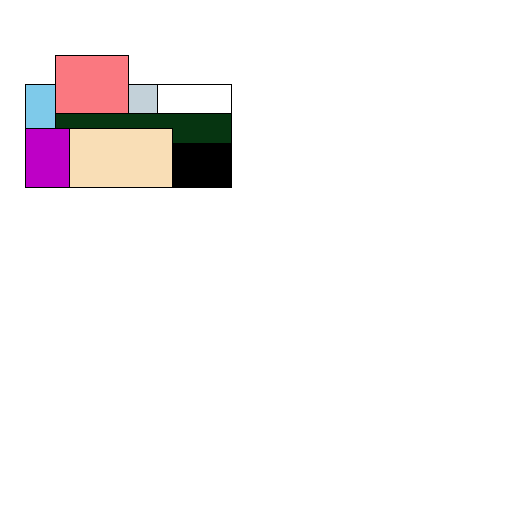

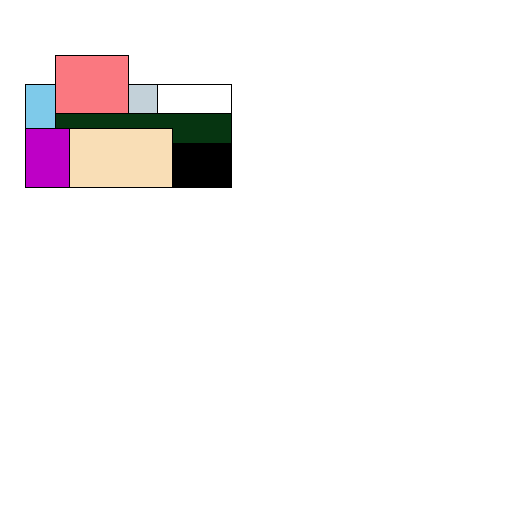

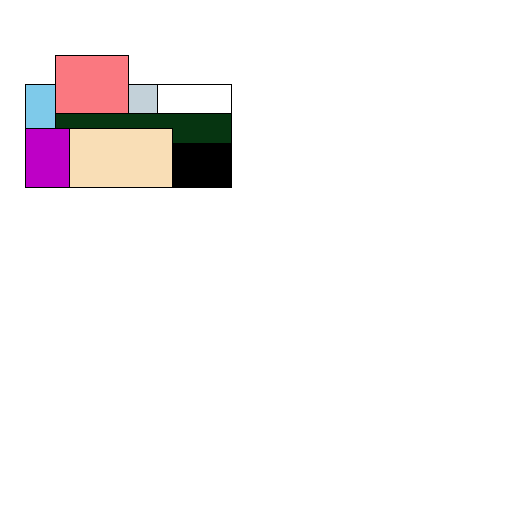

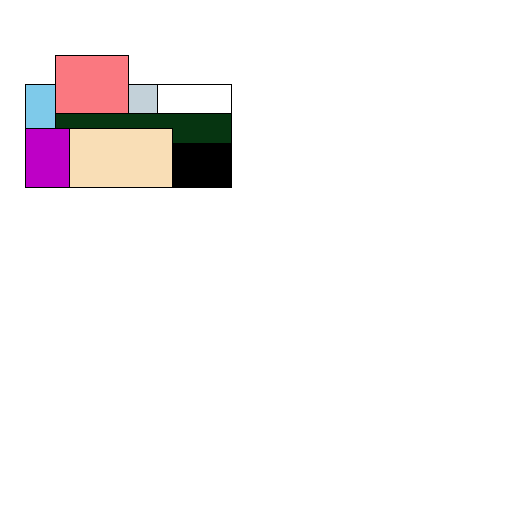

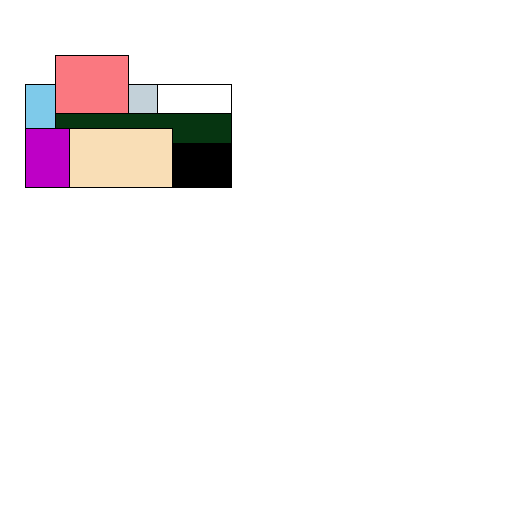

In [13]:
for x in trajectory:
    if x==0:
        print(0)
    else:
        display(x.get_image())

# Architext's evaluations

In [5]:
from design_eval import eval_function
from utils import *

test_data = {
    'samples': ['[prompt] a house with seven rooms and a corridor [layout] bedroom1: (194,106)(165,106)(165,47)(194,47), living_room: (179,223)(106,223)(106,121)(165,121)(165,135)(179,135), bathroom1: (165,106)(135,106)(135,77)(165,77), bedroom2: (135,106)(91,106)(91,33)(135,33), bathroom2: (106,165)(77,165)(77,135)(106,135), bedroom3: (91,106)(77,106)(77,121)(47,121)(47,62)(91,62), kitchen: (209,194)(179,194)(179,135)(194,135)(194,121)(209,121), corridor: (194,135)(165,135)(165,121)(106,121)(106,135)(77,135)(77,106)(194,106) <|endoftext|>',
                '[prompt] a bedroom is located in the east side of the house [layout] bathroom1: (135,99)(91,99)(91,69)(135,69), bedroom1: (121,69)(77,69)(77,25)(121,25), living_room: (179,157)(135,157)(135,69)(179,69), kitchen: (135,157)(91,157)(91,99)(135,99), bedroom2: (179,187)(121,187)(121,157)(179,157), bathroom2: (121,187)(91,187)(91,157)(121,157), bedroom3: (165,231)(106,231)(106,187)(165,187), bedroom4: (179,69)(121,69)(121,25)(179,25) <|endoftext|>',
                '[prompt] a house with two bedrooms and one bathroom [layout] bedroom1: (135,135)(91,135)(91,77)(135,77), living_room: (194,135)(135,135)(135,62)(194,62), kitchen: (194,194)(165,194)(165,135)(194,135), bedroom2: (150,165)(106,165)(106,135)(150,135), bathroom: (106,165)(62,165)(62,135)(106,135) <|endoftext|>'],
    'prompts': ['a house with seven rooms and a corridor', 
                'a bedroom is located in the east side of the house',
                'a house with two bedrooms and one bathroom'],
    'prompt_types': ['total_number_prompt', 'location_prompt', 'ind_number_prompt']
    }


semantic_accuracy = []
reward = []
samples, prompts, prompt_types = test_data['samples'], test_data['prompts'], test_data['prompt_types']
results = eval_function(samples, prompts, prompt_types)
print(results)

0
2
{'semantic_accuracy': [True, True, True], 'reward': [[0], [-1], [0]]}


In [7]:
import random
random.choice([1,2,3])

3